##                                                      TAXI_OUT TIME PROJECT
BY SUNANDA VEGANTI

# DATA DESCRIPTION: 

The Dataset contains the information related to the features of the flights leaving from JKF airport between Nov 2019-Dec-2020 details. The Dataset comprises 23 features and 27,000 data points.

# DATASET DICTIONARY:

# Required libraries

In [1]:
# type your code here

# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import train-test split 
from sklearn.model_selection import train_test_split

# import function to perform linear regression using OLS
import statsmodels.api as sm

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import boxcox

In [2]:
# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

#importing several other functions
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RepeatedKFold, train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import BayesianRidge, Lasso, LinearRegression, Ridge, RidgeCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [3]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

#Display all columns while printing the dataframe
pd.set_option('display.width', 1200)
pd.set_option('display.max_columns', 25)

# Read And Display Data

In [4]:
# import 'Pandas' 
import pandas as pd 

# read csv file using pandas
df = pd.read_csv('M1_final.csv')

# display the top 5 rows of the dataframe
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,323,448,48,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,333,531,48,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,341,482,48,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,343,513,48,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,356,499,46,32,58,W,24,35,29.91,Fair / Windy,9,17,13


# Data Dimension

In [5]:
# .shape returns the dimension of the data

df.shape

(28820, 23)

We see the dataframe has 23 columns and 28820 observations.

# Renaming columns

This is done for better understanding.

In [6]:
column_names = {"OP_UNIQUE_CARRIER":"CARRIER_CODE",
                "TAIL_NUM":"FLIGHT_NO",
                "DEST":"DESTINATION",
                "CRS_ELAPSED_TIME":"SCHEDULED_DURATION",
                "CRS_DEP_M":"SCHEDULED_DEPARTURE_TIME",
                "DEP_TIME_M":"ACTUAL_DEP_TIME",
                "CRS_ARR_M":"SCHEDULED_ARRIVAL_TIME",
                "sch_dep":"FLT_SCH_ARRIVAL",
                "sch_arr":"FLT_SCH_DEPARTURE"
               }

df = df.rename(column_names, axis=1)

df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CARRIER_CODE,FLIGHT_NO,DESTINATION,DEP_DELAY,SCHEDULED_DURATION,DISTANCE,SCHEDULED_DEPARTURE_TIME,ACTUAL_DEP_TIME,SCHEDULED_ARRIVAL_TIME,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,FLT_SCH_ARRIVAL,FLT_SCH_DEPARTURE,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,323,448,48,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,333,531,48,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,341,482,48,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,343,513,48,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,356,499,46,32,58,W,24,35,29.91,Fair / Windy,9,17,13


# Checking data type

It is important to check the data type of all the features and change the incorrect data types.

In [7]:
# use .dtypes to view the data type of a variable

df.dtypes

MONTH                         int64
DAY_OF_MONTH                  int64
DAY_OF_WEEK                   int64
CARRIER_CODE                 object
FLIGHT_NO                    object
DESTINATION                  object
DEP_DELAY                     int64
SCHEDULED_DURATION            int64
DISTANCE                      int64
SCHEDULED_DEPARTURE_TIME      int64
ACTUAL_DEP_TIME               int64
SCHEDULED_ARRIVAL_TIME        int64
Temperature                   int64
Dew Point                    object
Humidity                      int64
Wind                         object
Wind Speed                    int64
Wind Gust                     int64
Pressure                    float64
Condition                    object
FLT_SCH_ARRIVAL               int64
FLT_SCH_DEPARTURE             int64
TAXI_OUT                      int64
dtype: object

**The feature `Dew Point` has been misinterpreted as data type object Let's convert it into numeric dtype**

In [8]:
# use .astype() to change the data type

df["Dew Point"] = df["Dew Point"].astype("int64")

Recheck the data types after the conversion

In [9]:
# recheck the data types using .dtypes

df.dtypes

MONTH                         int64
DAY_OF_MONTH                  int64
DAY_OF_WEEK                   int64
CARRIER_CODE                 object
FLIGHT_NO                    object
DESTINATION                  object
DEP_DELAY                     int64
SCHEDULED_DURATION            int64
DISTANCE                      int64
SCHEDULED_DEPARTURE_TIME      int64
ACTUAL_DEP_TIME               int64
SCHEDULED_ARRIVAL_TIME        int64
Temperature                   int64
Dew Point                     int64
Humidity                      int64
Wind                         object
Wind Speed                    int64
Wind Gust                     int64
Pressure                    float64
Condition                    object
FLT_SCH_ARRIVAL               int64
FLT_SCH_DEPARTURE             int64
TAXI_OUT                      int64
dtype: object

Note the data types are now as per the data definition. Now we can proceed with the analysis.

# Summary Statistics

In our dataset we have numerical and categorical variables. Now we check for summary statistics of all the variables.

In [10]:
# describe the numerical data: For numerical variables, we use .describe()

df.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,SCHEDULED_DURATION,DISTANCE,SCHEDULED_DEPARTURE_TIME,ACTUAL_DEP_TIME,SCHEDULED_ARRIVAL_TIME,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,FLT_SCH_ARRIVAL,FLT_SCH_DEPARTURE,TAXI_OUT
count,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000
mean,7.894240,16.021096,4.008952,6.374983,225.288203,1267.746079,831.003851,828.934698,910.874289,41.489833,30.420819,57.732616,12.367627,5.535323,30.092433,31.091256,28.432130,20.858570
std,4.991723,8.750179,1.985230,38.735144,119.482417,889.343246,299.398525,305.864103,345.411743,8.043533,12.314083,23.468676,6.259298,11.886457,0.296160,9.510359,8.263043,6.851915
min,1.000000,1.000000,1.000000,-22.000000,57.000000,94.000000,301.000000,1.000000,1.000000,17.000000,-3.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000,5.000000
25%,1.000000,8.000000,2.000000,-6.000000,124.000000,483.000000,545.000000,542.000000,667.000000,36.000000,23.000000,46.000000,8.000000,0.000000,29.880000,26.000000,21.000000,16.000000
50%,11.000000,16.000000,4.000000,-3.000000,188.000000,1029.000000,856.000000,854.000000,918.000000,42.000000,31.000000,59.000000,12.000000,0.000000,30.110000,30.000000,30.000000,19.000000
75%,12.000000,24.000000,6.000000,2.000000,365.000000,2248.000000,1095.000000,1097.000000,1193.000000,47.000000,39.000000,74.000000,16.000000,0.000000,30.320000,37.000000,35.000000,25.000000
max,12.000000,31.000000,7.000000,1276.000000,697.000000,4983.000000,1439.000000,1440.000000,1439.000000,68.000000,67.000000,97.000000,36.000000,49.000000,30.750000,55.000000,46.000000,41.000000


The above output illustrates the summary statistics of all the numeric variables like the mean, median(50%), minimum, and maximum values, along with the standard deviation.

If we observe the count of all the variables, the count is equal to the total number of observations. So, we can say that there are no missing values in these numeric variables.

In [11]:
# For categorical features, we use .describe(include=object)

df.describe(include=object)

,CARRIER_CODE,FLIGHT_NO,DESTINATION,Wind,Condition
count,28820,28820,28820,28818,28820
unique,9,2092,65,18,25
top,B6,N102NN,LAX,W,Mostly Cloudy
freq,9589,108,2974,3273,9124


count - Total number of observations,
unique - Number of unique classes in a variable,
top - The most repeated class,
freq - Frequency of most repeated class,

For variable Destination, it is apparent that there are 65 different destinations and most of the flights are heading to 'LAX'(Los Angeles).
And the climatic condition is 'Mostly cloudy' most of the time.

If we observe the count of all the variables, the count of the feature 'Wind' is not equal to the total number of observations. So, we can say that there are missing values in this variable and we have to treat them.

# Treating null values

In [12]:
# obtain the total missing values for each variable
# 'isnull().sum()' returns the number of missing values in each variable

Total = df.isnull().sum().sort_values(ascending=False) 

# obtain the percent of missing values for each variable
# 'isnull().count()' returns the count of the data, i.e. count of outcomes 'True' and 'False' of isnull() 

Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# keys:pass a list of column names in parameter  
# axis = 1: concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])

# print the missing data
missing_data

,Total,Percentage of Missing Values
Wind,2,0.00694
MONTH,0,0.00000
Temperature,0,0.00000
FLT_SCH_DEPARTURE,0,0.00000
FLT_SCH_ARRIVAL,0,0.00000
Condition,0,0.00000
Pressure,0,0.00000
Wind Gust,0,0.00000
Wind Speed,0,0.00000
Humidity,0,0.00000


**There are 2 null values in Wind variable. As Wind is a categorical variable, it is appropriate to impute the null values with the category having highest frequency**

In [13]:
df['Wind'].value_counts().sort_values(ascending=False)

W       3273
NW      3173
NNW     2570
WSW     2567
N       2453
SW      2354
WNW     2145
S       1879
SSW     1632
NNE     1280
ENE     1124
E       1068
NE      1044
CALM     835
ESE      466
SE       345
SSE      315
VAR      295
Name: Wind, dtype: int64

**'W' is the category having highest frequency.**

In [14]:
df['Wind'].replace(np.nan,'W',inplace=True)

**Check if the null values have been replaced.**

In [15]:
df.isna().sum()

MONTH                       0
DAY_OF_MONTH                0
DAY_OF_WEEK                 0
CARRIER_CODE                0
FLIGHT_NO                   0
DESTINATION                 0
DEP_DELAY                   0
SCHEDULED_DURATION          0
DISTANCE                    0
SCHEDULED_DEPARTURE_TIME    0
ACTUAL_DEP_TIME             0
SCHEDULED_ARRIVAL_TIME      0
Temperature                 0
Dew Point                   0
Humidity                    0
Wind                        0
Wind Speed                  0
Wind Gust                   0
Pressure                    0
Condition                   0
FLT_SCH_ARRIVAL             0
FLT_SCH_DEPARTURE           0
TAXI_OUT                    0
dtype: int64

**Now, we obtain the dataset with no missing values.**

# Correlation

Correlation is the extent of linear relationship among numeric variables.
It indicates the extent to which two variables increase or decrease in parallel.

**Filter out only the numeric variables from the dataframe using select_dtypes() function**

In [16]:
df_numeric_features = df.select_dtypes(include=np.number)

# print the names of the numeric variables 
df_numeric_features.columns

Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'DEP_DELAY', 'SCHEDULED_DURATION', 'DISTANCE', 'SCHEDULED_DEPARTURE_TIME', 'ACTUAL_DEP_TIME', 'SCHEDULED_ARRIVAL_TIME', 'Temperature', 'Dew Point', 'Humidity', 'Wind Speed', 'Wind Gust', 'Pressure', 'FLT_SCH_ARRIVAL', 'FLT_SCH_DEPARTURE', 'TAXI_OUT'], dtype='object')

The dataframe df_numeric_features has 18 numeric variables.

In [17]:
# generate the correlation matrix
corr =  df_numeric_features.corr()

# print the correlation matrix
corr

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,SCHEDULED_DURATION,DISTANCE,SCHEDULED_DEPARTURE_TIME,ACTUAL_DEP_TIME,SCHEDULED_ARRIVAL_TIME,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,FLT_SCH_ARRIVAL,FLT_SCH_DEPARTURE,TAXI_OUT
MONTH,1.000000,-0.007254,0.029365,0.046455,-0.016052,-0.000144,0.001824,0.002632,-0.012361,0.135682,0.135040,0.012515,-0.035097,-0.051014,-0.085274,-0.006191,-0.019705,0.018505
DAY_OF_MONTH,-0.007254,1.000000,-0.029732,-0.036618,0.002761,-0.002762,0.001754,0.004446,0.008519,-0.132457,-0.040129,0.096215,-0.093211,-0.088991,0.016871,-0.003417,0.002223,-0.023990
DAY_OF_WEEK,0.029365,-0.029732,1.000000,-0.006203,0.000413,0.002450,0.005411,0.008256,-0.003339,0.013081,-0.073816,0.001627,0.095943,0.127689,0.102289,0.024415,0.009621,0.028388
DEP_DELAY,0.046455,-0.036618,-0.006203,1.000000,-0.030871,-0.031507,0.102384,0.072340,0.043691,-0.032261,-0.000013,-0.011776,0.067718,0.044340,-0.064939,-0.065452,-0.006949,0.034881
SCHEDULED_DURATION,-0.016052,0.002761,0.000413,-0.030871,1.000000,0.994465,-0.031332,-0.021391,0.035186,-0.016050,0.007246,0.017198,-0.013440,-0.011934,0.010165,0.083426,-0.067669,0.070838
DISTANCE,-0.000144,-0.002762,0.002450,-0.031507,0.994465,1.000000,-0.040963,-0.034604,0.008520,-0.009923,0.009789,0.015110,-0.010734,-0.009522,0.005692,0.059174,-0.088793,0.059856
SCHEDULED_DEPARTURE_TIME,0.001824,0.001754,0.005411,0.102384,-0.031332,-0.040963,1.000000,0.946023,0.452476,0.086371,0.001578,0.003843,0.008063,-0.009887,-0.008285,-0.025621,0.495286,0.044864
ACTUAL_DEP_TIME,0.002632,0.004446,0.008256,0.072340,-0.021391,-0.034604,0.946023,1.000000,0.469758,0.098105,0.008907,-0.005923,0.006033,-0.014336,-0.009410,0.025609,0.544197,0.057896
SCHEDULED_ARRIVAL_TIME,-0.012361,0.008519,-0.003339,0.043691,0.035186,0.008520,0.452476,0.469758,1.000000,0.101620,-0.000442,-0.033163,0.014180,0.004486,-0.012682,0.149903,0.424209,0.071377
Temperature,0.135682,-0.132457,0.013081,-0.032261,-0.016050,-0.009923,0.086371,0.098105,0.101620,1.000000,0.787864,0.054401,0.010603,-0.039487,-0.376730,-0.022534,0.075958,-0.067574


Pass the correlation matrix to the heatmap() function of the seaborn library to plot the heatmap of the correlation matrix

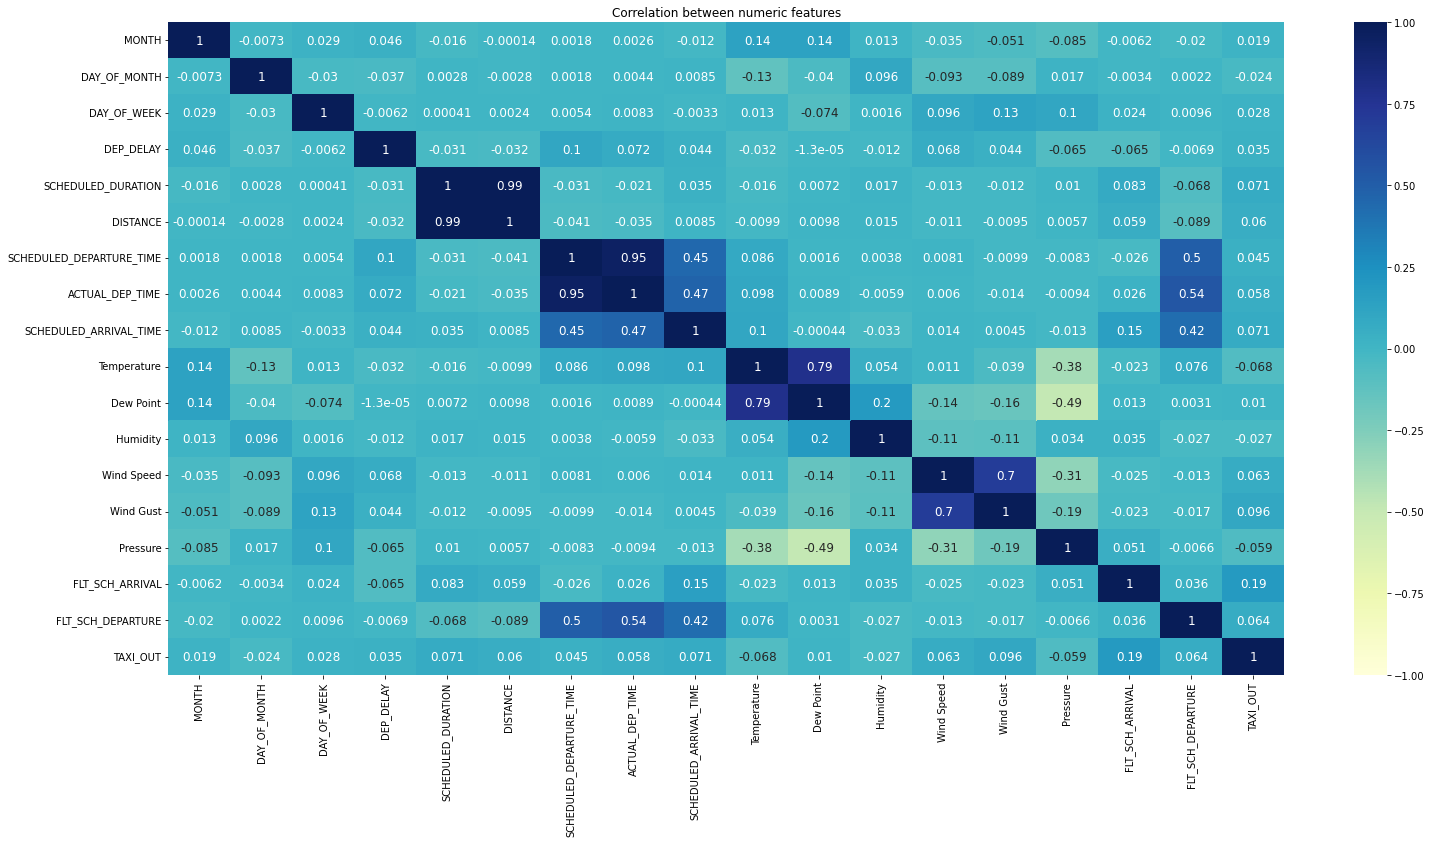

In [18]:
# set the figure size
plt.figure(figsize=(25, 12))

# plot the heat map
# corr: give the correlation matrix
# cmap: colour code used for plotting
# vmax: gives maximum range of values for the chart
# vmin: gives minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: Sets the font size of the annotation
sns.heatmap(corr, cmap='YlGnBu', vmax=1.0, vmin=-1.0, annot = True, annot_kws={"size": 12})

# specify name of the plot using plt.title()
plt.title('Correlation between numeric features')

# display the plot
plt.show()

It can be observed that a few numeric variables are correlated with each other since the correlation coefficients are close to one. (scheduled_duration and Distance) , (Sch_dep_time and actual_Dep_time) and (temperature and dew point) are correlated. **It implies that there is multicollinearity in the data.**
Recollect that one of the assumptions of linear regression is that, there should be NO Multicollinearity present in the data.

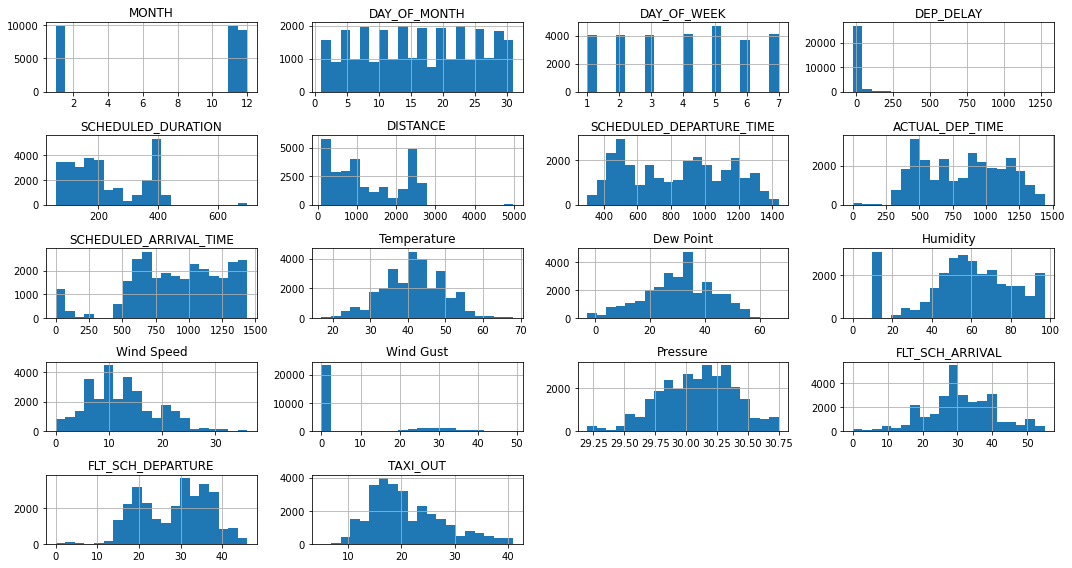

In [19]:
df.hist(bins = 20, figsize = (15,8))

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

<a id='categorical'></a>
### Analyze Relationship Between Target and Categorical Variables
Categorical variables are those in which the values are labeled categories. The categorical variables are best understood with bar plots.

In [20]:
df.describe(include=object)

,CARRIER_CODE,FLIGHT_NO,DESTINATION,Wind,Condition
count,28820,28820,28820,28820,28820
unique,9,2092,65,18,25
top,B6,N102NN,LAX,W,Mostly Cloudy
freq,9589,108,2974,3275,9124


<AxesSubplot:xlabel='CARRIER_CODE'>

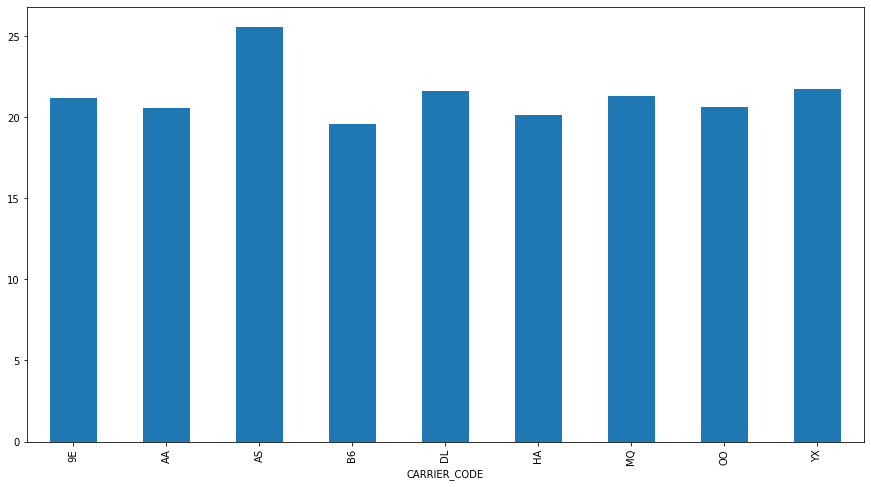

In [21]:
df.groupby('CARRIER_CODE')['TAXI_OUT'].mean().plot(kind="bar")

Carriers have similar taxi out time. We can drop carrier code since their Taxi out time does not differ that much.

In [22]:
df.drop(["CARRIER_CODE"], axis=1, inplace=True)

From the description it is observed that flight number has a huge number of unique categories, so it cannot be used to predict the target variable

In [23]:
df.drop(["FLIGHT_NO"], axis=1, inplace=True)

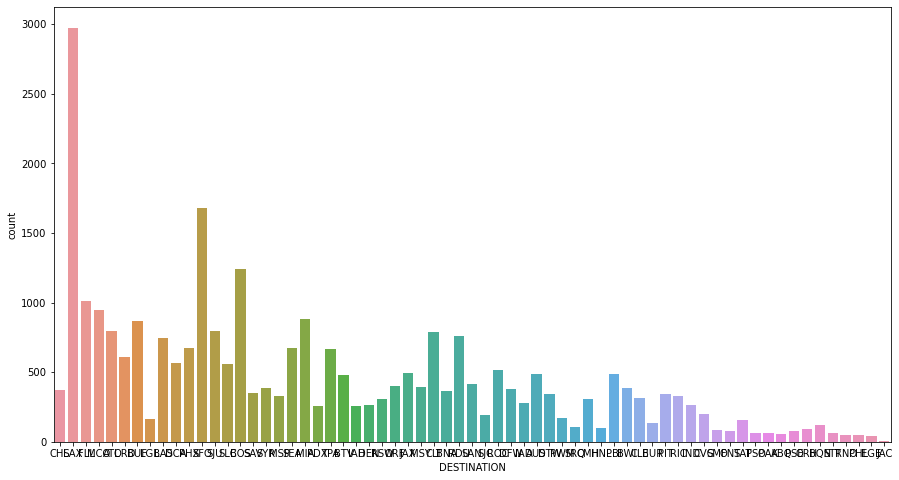

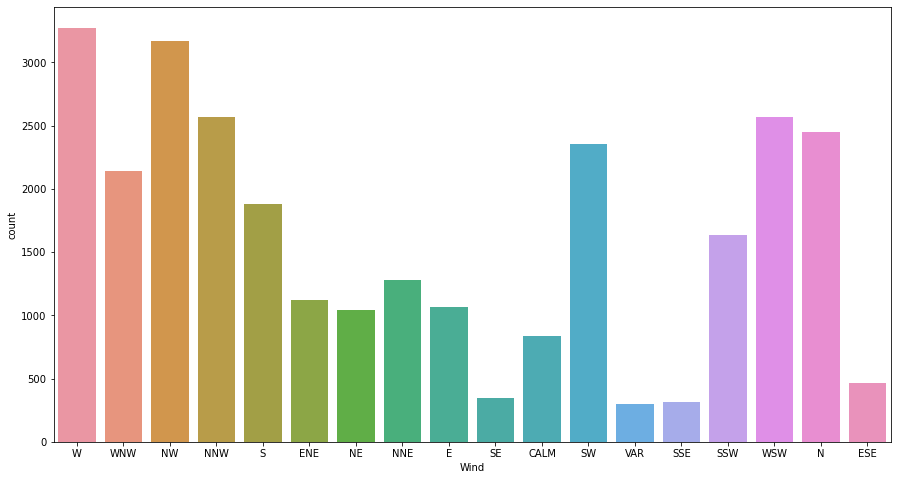

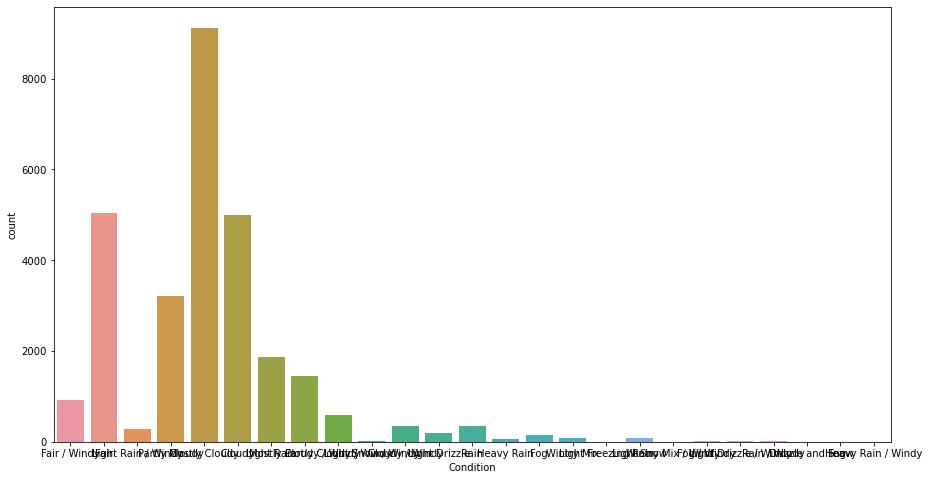

In [24]:
df_categoric_features = df.select_dtypes(include='object')
# plot the count distribution for each categorical variable 
# 'figsize' sets the figure size
# plot a count plot for all the categorical variables
for i in df_categoric_features:
    sns.countplot(df[i])
    plt.show()

<AxesSubplot:ylabel='Condition'>

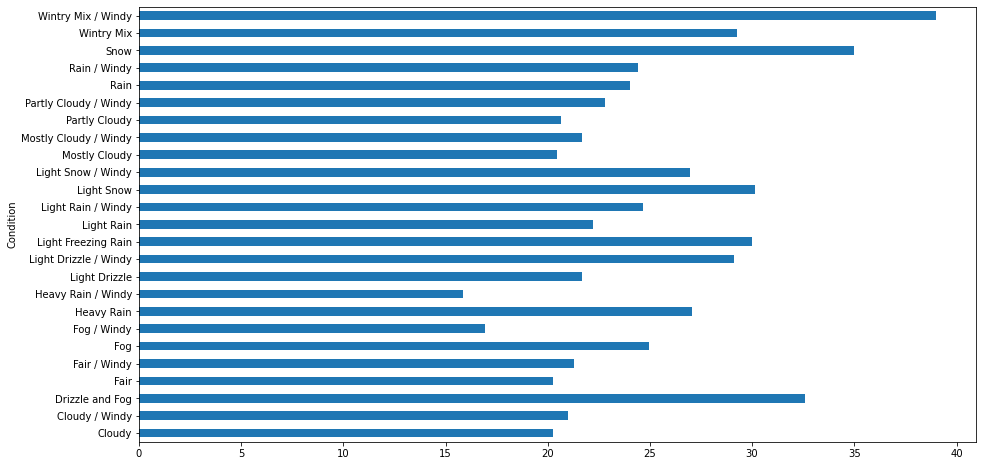

In [25]:
df.groupby('Condition')['TAXI_OUT'].mean().plot(kind="barh")

The above bar plot represents that SNOW and WINTRY MIX condition affects the Taxi-out time more.

<AxesSubplot:ylabel='Wind'>

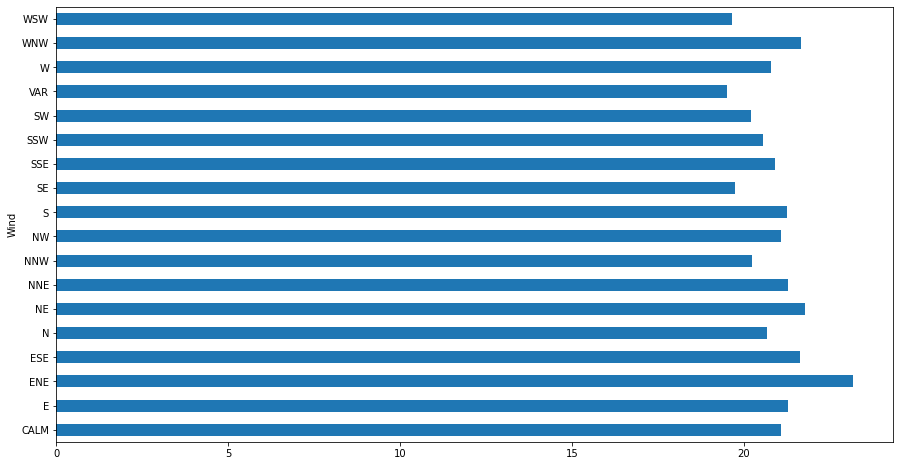

In [26]:
df.groupby('Wind')['TAXI_OUT'].mean().plot(kind="barh")

Wind direction doesn't have much effect on Run time (Taxi-out).

# FEATURE ENGINEERING

Let us create a new feature called 'TOTAL_SCHEDULED' by combining 'FLT_SCH_ARRIVAL' and 'FLT_SCH_DEPARTURE'. This feature gives us information about the total number of flights that are scheduled.

In [27]:
df["TOTAL_SCHEDULED"] = df["FLT_SCH_ARRIVAL"] + df["FLT_SCH_DEPARTURE"]

As we have used FLT_SCH_ARRIVAL and FLT_SCH_DEPARTURE to calculate TOTAL_SCHEDULED so we can drop them.

In [28]:
df.drop(["FLT_SCH_ARRIVAL"], axis=1, inplace=True)
df.drop(["FLT_SCH_DEPARTURE"], axis=1, inplace=True)

From the dataset, it is clear that DEP_DELAY is calculated as 

**[DEP_DELAY = ACTUAL_DEP_TIME - SCHEDULED_DEPARTURE_TIME]**

As ACTUAL_DEP_TIME and SCHEDULED_DEPARTURE_TIME are used in the DEP_DELAY feature, we can drop either of them.

In [29]:
df.drop(["ACTUAL_DEP_TIME"], axis=1, inplace=True)

In [30]:
speed = df.DISTANCE / df.SCHEDULED_DURATION
speed.head()

0    5.129032
1    6.671159
2    5.906077
3    5.619048
4    5.467626
dtype: float64

In [31]:
speed.describe()

count    28820.000000
mean         4.988969
std          1.422316
min          1.189873
25%          3.778761
50%          5.426396
75%          6.246377
max          7.550000
dtype: float64

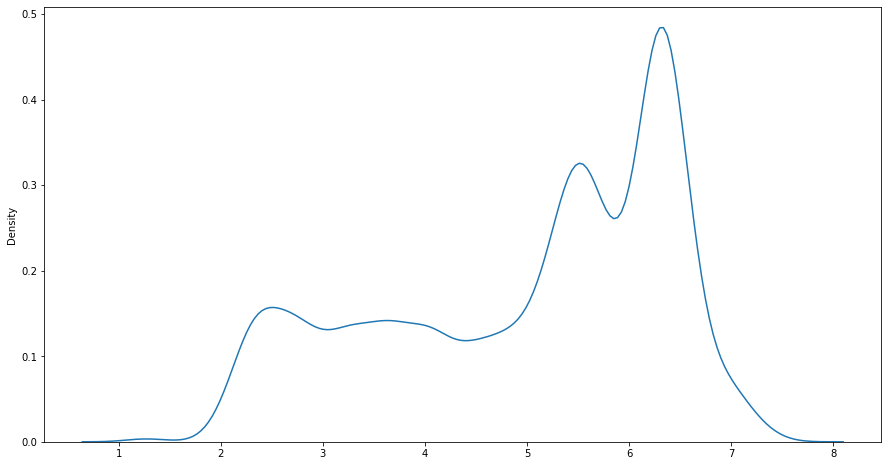

In [32]:
sns.kdeplot(speed)
plt.show()

In [33]:
print(speed.corr(df.DISTANCE))
print(speed.corr(df.SCHEDULED_DURATION))
print(df.DISTANCE.corr(df.SCHEDULED_DURATION))

0.8743394793787895
0.8461436320681602
0.9944649717496475


Since the distance covered is directly proportional to duration, DISTANCE and SCHEDULED_DURATION has high correlation (0.99).

Hence we introduce 'AVG_SPEED' (DISTANCE / SCHEDULED_DURATION) as a new column, replacing DISTANCE.

In [34]:
df['AVG_SPEED'] = round(speed, 2)
df.drop('DISTANCE', axis=1, inplace=True)

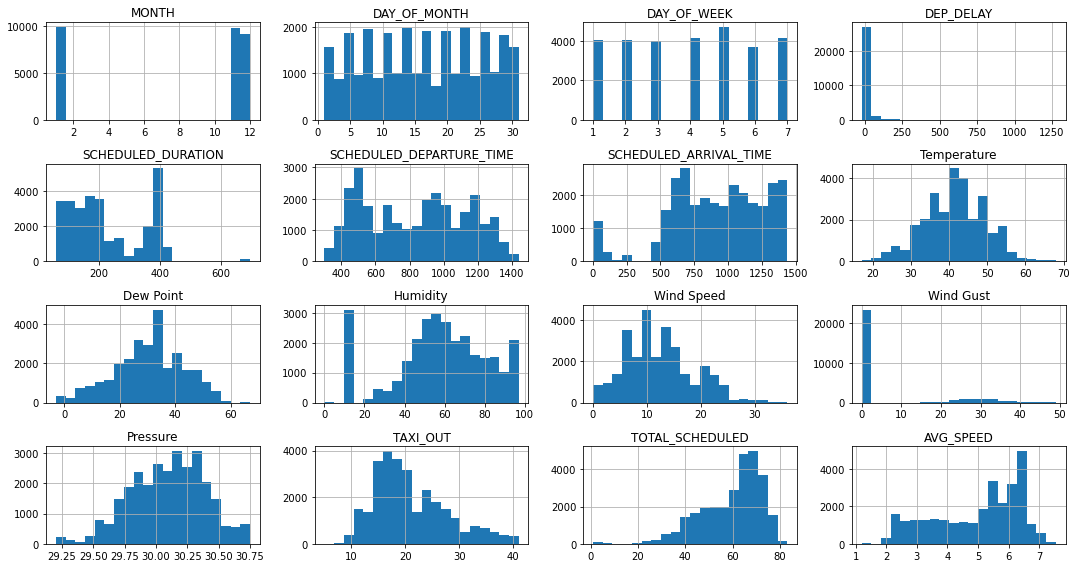

In [35]:
df.hist(bins = 20, figsize = (15,8))

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

In [36]:
df.MONTH.value_counts()

1     9869
11    9769
12    9182
Name: MONTH, dtype: int64

In [37]:
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DESTINATION,DEP_DELAY,SCHEDULED_DURATION,SCHEDULED_DEPARTURE_TIME,SCHEDULED_ARRIVAL_TIME,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,TAXI_OUT,TOTAL_SCHEDULED,AVG_SPEED
0,11,1,5,CHS,-1,124,324,448,48,34,58,W,25,38,29.86,Fair / Windy,14,26,5.13
1,11,1,5,LAX,-7,371,340,531,48,34,58,W,25,38,29.86,Fair / Windy,15,26,6.67
2,11,1,5,FLL,40,181,301,482,48,34,58,W,25,38,29.86,Fair / Windy,22,26,5.91
3,11,1,5,MCO,-2,168,345,513,48,34,58,W,25,38,29.86,Fair / Windy,12,26,5.62
4,11,1,5,ATL,-4,139,360,499,46,32,58,W,24,35,29.91,Fair / Windy,13,26,5.47


MONTH column has only 3 values, November, December, January. Hence encode them as 0,0.5,1 respectively.

In [38]:
df.MONTH.replace({11:0, 12:0.5,1:1}, inplace=True)
df.MONTH.value_counts()

1.0    9869
0.0    9769
0.5    9182
Name: MONTH, dtype: int64

In [39]:
# Frequency of values is almost similiar in DAY_OF_MONTH, DAY_OF_WEEK columns. Hence Min Max normalization is done
minmax = MinMaxScaler()
df.DAY_OF_MONTH = minmax.fit_transform(np.array(df['DAY_OF_MONTH']).reshape(-1,1))
df.DAY_OF_WEEK = minmax.fit_transform(np.array(df.DAY_OF_WEEK).reshape(-1,1))
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DESTINATION,DEP_DELAY,SCHEDULED_DURATION,SCHEDULED_DEPARTURE_TIME,SCHEDULED_ARRIVAL_TIME,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,TAXI_OUT,TOTAL_SCHEDULED,AVG_SPEED
0,0.0,0.0,0.666667,CHS,-1,124,324,448,48,34,58,W,25,38,29.86,Fair / Windy,14,26,5.13
1,0.0,0.0,0.666667,LAX,-7,371,340,531,48,34,58,W,25,38,29.86,Fair / Windy,15,26,6.67
2,0.0,0.0,0.666667,FLL,40,181,301,482,48,34,58,W,25,38,29.86,Fair / Windy,22,26,5.91
3,0.0,0.0,0.666667,MCO,-2,168,345,513,48,34,58,W,25,38,29.86,Fair / Windy,12,26,5.62
4,0.0,0.0,0.666667,ATL,-4,139,360,499,46,32,58,W,24,35,29.91,Fair / Windy,13,26,5.47


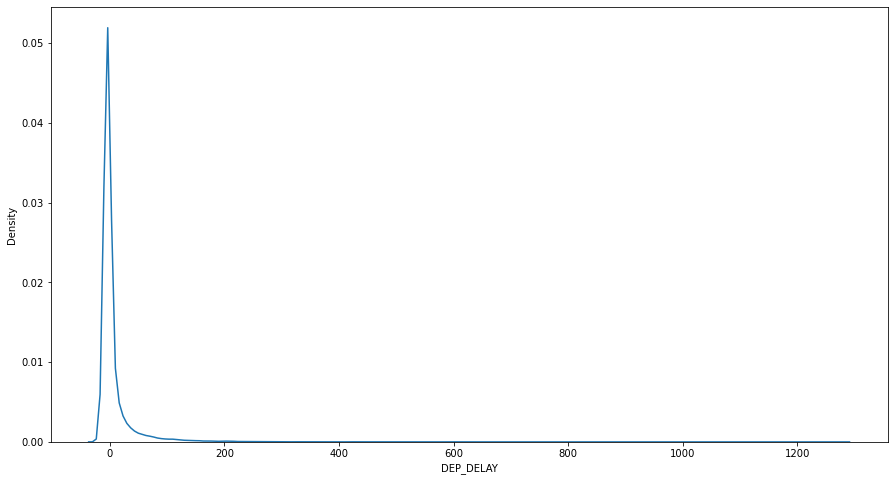

In [40]:
sns.kdeplot(df.DEP_DELAY)
plt.show()

In [41]:
# DEP_DELAY column is heavily positively skewed and has negative values. Hence Cube Root Transformation is done 
df.DEP_DELAY = np.cbrt(df.DEP_DELAY)

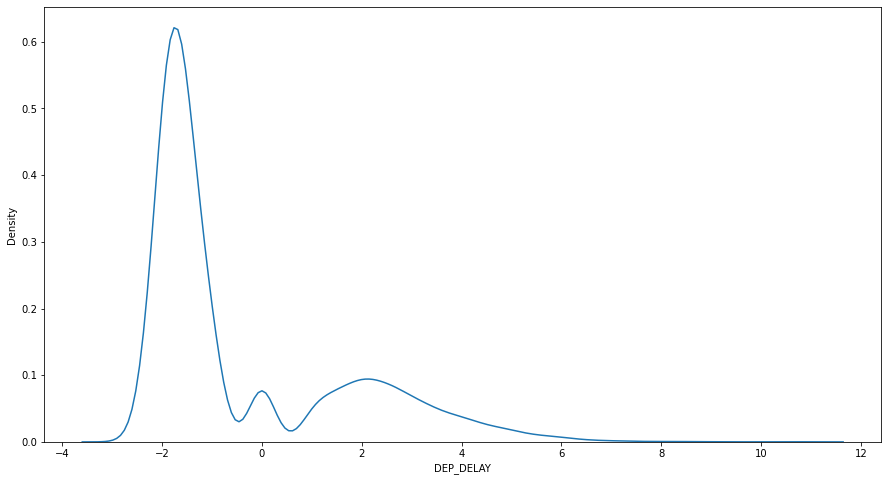

In [42]:
sns.kdeplot(df.DEP_DELAY)
plt.show()

<AxesSubplot:xlabel='SCHEDULED_DURATION', ylabel='Density'>

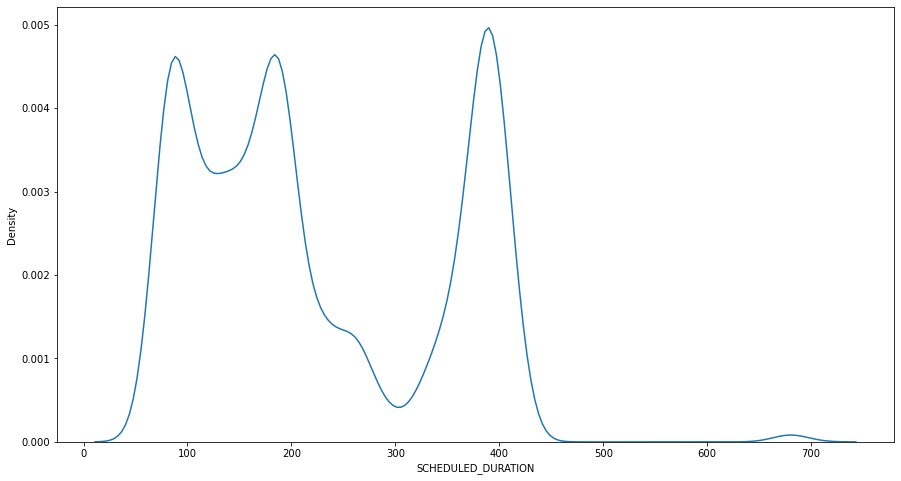

In [43]:
sns.kdeplot(df.SCHEDULED_DURATION)

<AxesSubplot:xlabel='SCHEDULED_DURATION', ylabel='Density'>

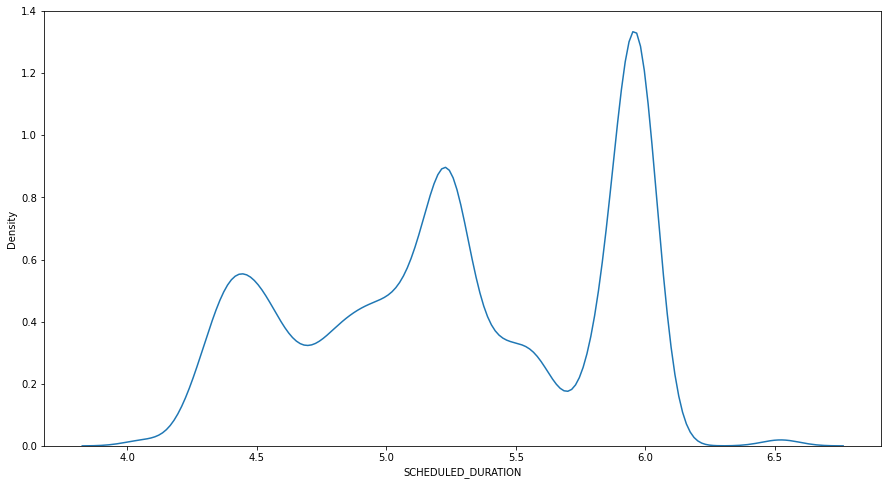

In [44]:
sns.kdeplot(np.log(df.SCHEDULED_DURATION))

In [45]:
df.SCHEDULED_DURATION.skew()

0.5165465855460522

In [46]:
np.log(df.SCHEDULED_DURATION).skew()

-0.12612977851643056

In [47]:
# SCHEDULED_DURATION is positively skewed. Hence Log Transformation is done.

df.SCHEDULED_DURATION = np.log(df.SCHEDULED_DURATION)

In [48]:
df.skew()

MONTH                      -0.006442
DAY_OF_MONTH               -0.007555
DAY_OF_WEEK                -0.011613
DEP_DELAY                   1.292685
SCHEDULED_DURATION         -0.126130
SCHEDULED_DEPARTURE_TIME    0.068962
SCHEDULED_ARRIVAL_TIME     -0.560634
Temperature                -0.077851
Dew Point                  -0.290058
Humidity                   -0.476176
Wind Speed                  0.488825
Wind Gust                   1.790200
Pressure                   -0.228947
TAXI_OUT                    0.794188
TOTAL_SCHEDULED            -1.058837
AVG_SPEED                  -0.566255
dtype: float64

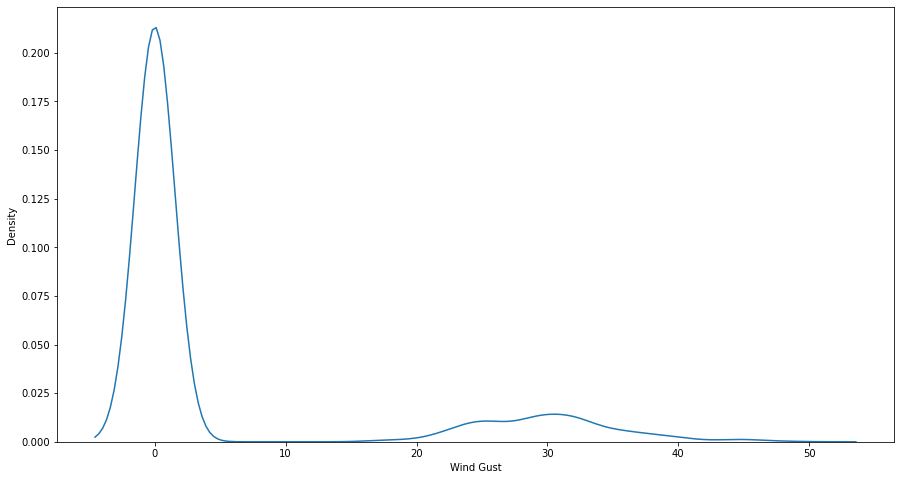

In [49]:
sns.kdeplot(df['Wind Gust'])
plt.show()

In [50]:
df['Wind Gust'][df['Wind Gust'] == 0].shape[0] *100 / df.shape[0]

81.56488549618321

81% of the records have Wind Gust as 0. Remaining 19% of data values ranges from 10 to 50.

Hence convert the Wind Gust Column into categorical variable

Class No : There is no Wind Gust

Class Yes : There is Wind Guest (1-50)

In [51]:
for x in df.index:
    if df['Wind Gust'][x]>0 :
        df['Wind Gust'][x]='YES'
    else: 
        df['Wind Gust'][x]='NO'

df['Wind Gust'].value_counts()

NO     23507
YES     5313
Name: Wind Gust, dtype: int64

In [52]:
df['Wind Gust'].dtype

dtype('O')

In [53]:
print(df.TAXI_OUT.skew())
print(np.log(df.TAXI_OUT).skew())

0.7941875464450502
0.10793500953028466


In [54]:
df.TAXI_OUT = np.log(df.TAXI_OUT)
df.TAXI_OUT.head()

0    2.639057
1    2.708050
2    3.091042
3    2.484907
4    2.564949
Name: TAXI_OUT, dtype: float64

In [55]:
print(df.TOTAL_SCHEDULED.skew())
print(np.power(df.TOTAL_SCHEDULED,3).skew())

-1.05883660962177
-0.07822637806626644


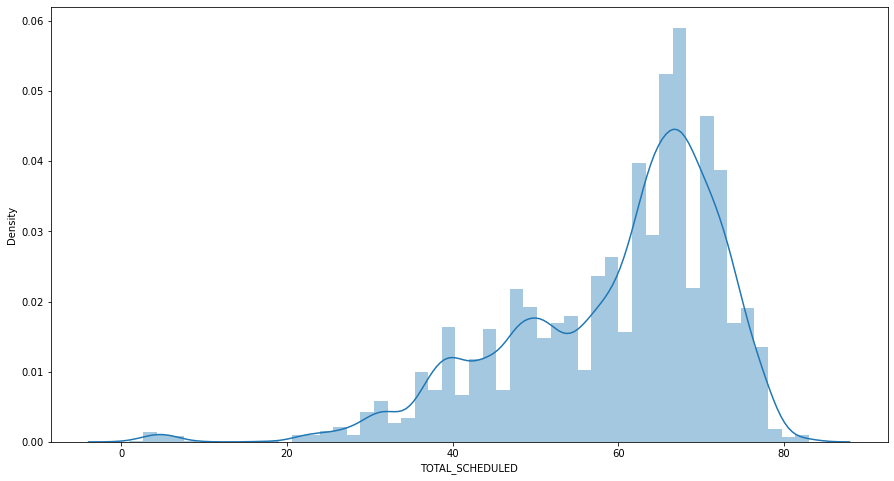

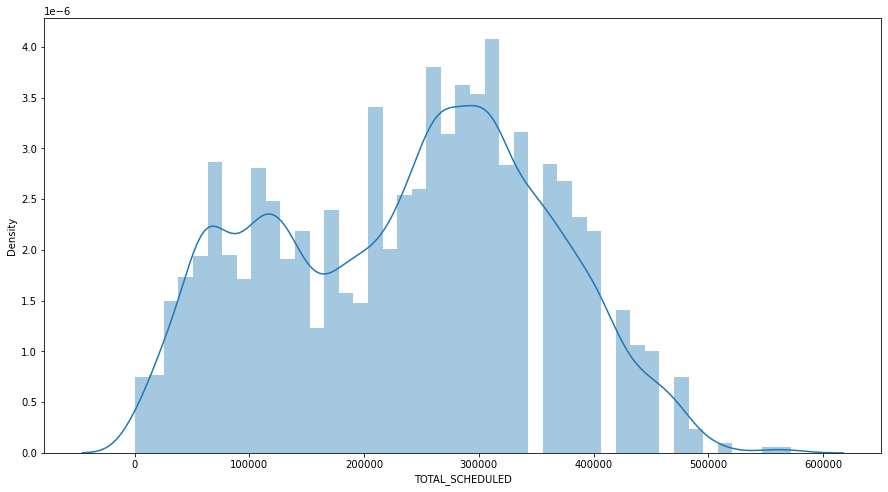

In [56]:
sns.distplot(df.TOTAL_SCHEDULED)
plt.show()

sns.distplot(np.power(df.TOTAL_SCHEDULED,3))
plt.show()

In [57]:
df.TOTAL_SCHEDULED = np.power(df.TOTAL_SCHEDULED,3)
df.TOTAL_SCHEDULED.head()

0    17576
1    17576
2    17576
3    17576
4    17576
Name: TOTAL_SCHEDULED, dtype: int64

# Outliers analysis and treatment

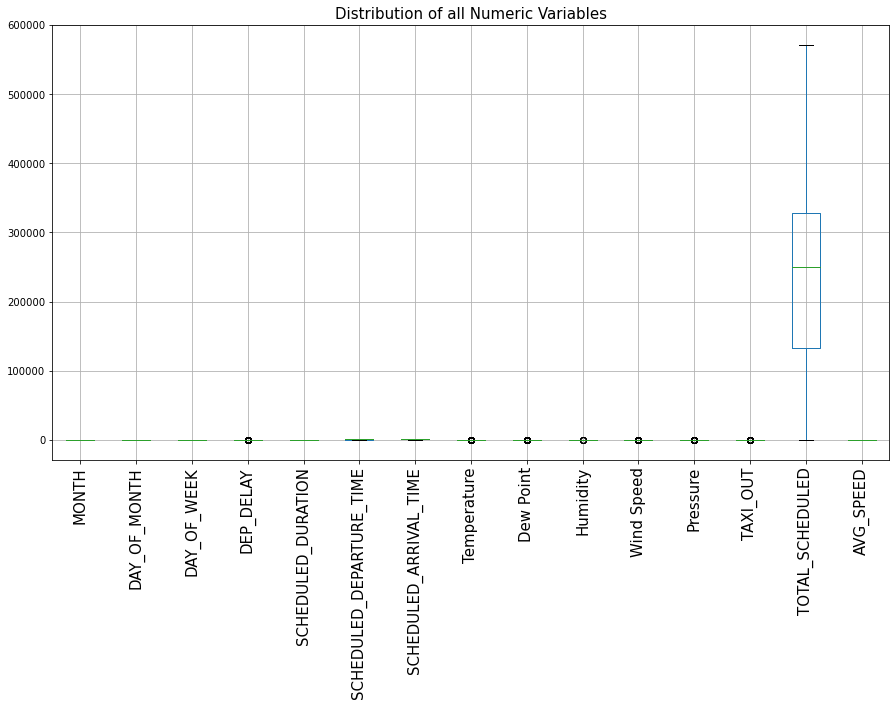

In [58]:
# plot a boxplot to visualize the outliers in all the numeric variables
df.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
# set text size using 'fontsize'
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

**Notice that the variable 'DISTANCE' and 'SCHEDULED_ARRIVAL' has a quite large range as compared to the other variables and there are no outliers present for 'SCHEDULED_ARRIVAL_TIME' and 'SCHEDULED_DURATION'. Thus, it is difficult to see the outliers with such variables. So, we plot the boxplots of independent variables again by not considering these variables.**

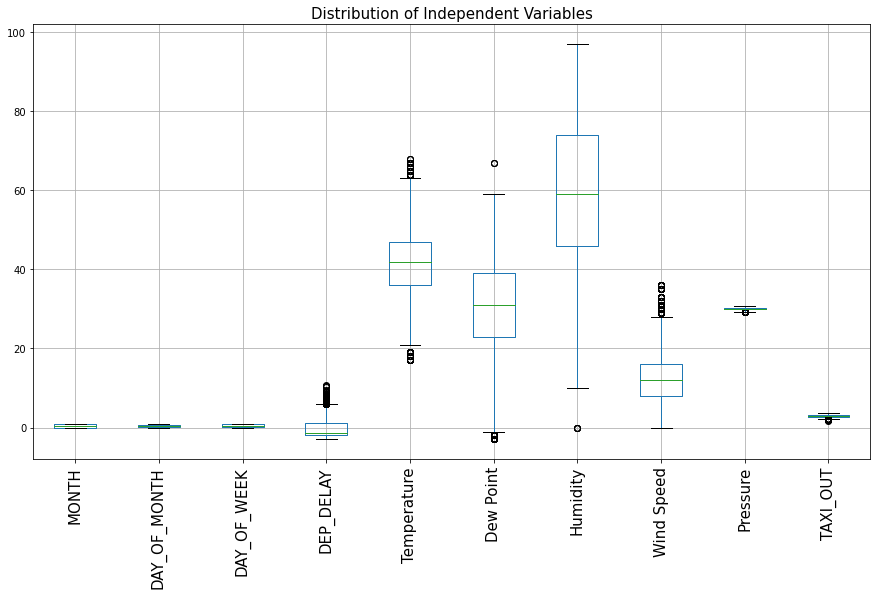

In [59]:
df.iloc[:,[0,1,2,4,8,9,10,11,12,13,14,16]].boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Independent Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

We can see that DEP_DELAY has some extreme outliers here.

In [60]:
# calculate the first quartile
Q1 = df.quantile(0.25)

# calculate the third quartile
Q3 = df.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR for each numeric variable
IQR = Q3 - Q1

# retrieve the dataframe without the outliers
# '~' returns the values that do not satisfy the given conditions 
# i.e. it returns values between the range [Q1-1.5*IQR, Q3+1.5*IQR]
# '|' is used as 'OR' operator on multiple conditions   
# 'any(axis=1)' checks the entire row for atleast one 'True' entry (the rows represent outliers in the data)
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [61]:
#After removing outliers:
print('The updated data:',df.shape)

The updated data: (27860, 19)


In [62]:
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DESTINATION,DEP_DELAY,SCHEDULED_DURATION,SCHEDULED_DEPARTURE_TIME,SCHEDULED_ARRIVAL_TIME,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,TAXI_OUT,TOTAL_SCHEDULED,AVG_SPEED
0,0.0,0.0,0.666667,CHS,-1.000000,4.820282,324,448,48,34,58,W,25,YES,29.86,Fair / Windy,2.639057,17576,5.13
1,0.0,0.0,0.666667,LAX,-1.912931,5.916202,340,531,48,34,58,W,25,YES,29.86,Fair / Windy,2.708050,17576,6.67
2,0.0,0.0,0.666667,FLL,3.419952,5.198497,301,482,48,34,58,W,25,YES,29.86,Fair / Windy,3.091042,17576,5.91
3,0.0,0.0,0.666667,MCO,-1.259921,5.123964,345,513,48,34,58,W,25,YES,29.86,Fair / Windy,2.484907,17576,5.62
4,0.0,0.0,0.666667,ATL,-1.587401,4.934474,360,499,46,32,58,W,24,YES,29.91,Fair / Windy,2.564949,17576,5.47


In [63]:
df.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,SCHEDULED_DURATION,SCHEDULED_DEPARTURE_TIME,SCHEDULED_ARRIVAL_TIME,Temperature,Dew Point,Humidity,Wind Speed,Pressure,TAXI_OUT,TOTAL_SCHEDULED,AVG_SPEED
count,27860.000000,27860.000000,27860.000000,27860.000000,27860.000000,27860.000000,27860.000000,27860.000000,27860.000000,27860.000000,27860.000000,27860.000000,27860.000000,27860.000000,27860.000000
mean,0.493539,0.500020,0.497146,-0.449236,5.267788,830.368772,910.040560,41.546913,30.677136,58.188981,12.049533,30.091946,2.987072,238706.866296,4.994032
std,0.411779,0.294314,0.332196,1.980669,0.565749,299.875631,345.896813,7.762409,11.922318,23.384238,5.940012,0.291268,0.317852,118482.771369,1.422469
min,0.000000,0.000000,0.000000,-2.802039,4.043051,301.000000,1.000000,21.000000,-1.000000,10.000000,0.000000,29.220000,2.197225,1.000000,1.190000
25%,0.000000,0.233333,0.166667,-1.817121,4.820282,542.000000,667.000000,36.000000,23.000000,47.000000,8.000000,29.880000,2.772589,132651.000000,3.780000
50%,0.500000,0.500000,0.500000,-1.442250,5.241747,856.000000,917.000000,42.000000,31.000000,59.000000,12.000000,30.110000,2.944439,250047.000000,5.430000
75%,1.000000,0.766667,0.833333,1.000000,5.902633,1095.000000,1193.000000,47.000000,39.000000,75.000000,16.000000,30.310000,3.218876,328509.000000,6.250000
max,1.000000,1.000000,1.000000,5.867464,6.546785,1439.000000,1439.000000,63.000000,59.000000,97.000000,28.000000,30.750000,3.713572,571787.000000,7.550000


In [64]:
df.describe(include='object')

,DESTINATION,Wind,Wind Gust,Condition
count,27860,27860,27860,27860
unique,65,18,2,23
top,LAX,W,NO,Mostly Cloudy
freq,2895,3153,23108,9005


# HANDLING CATEGORICAL FEATURES.

In [65]:
# filter the categorical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.object]' will include all the categorical variables

df_cat = df.select_dtypes(include = [np.object])

# display categorical features
df_cat.head()

,DESTINATION,Wind,Wind Gust,Condition
0,CHS,W,YES,Fair / Windy
1,LAX,W,YES,Fair / Windy
2,FLL,W,YES,Fair / Windy
3,MCO,W,YES,Fair / Windy
4,ATL,W,YES,Fair / Windy


In [66]:
df_cat['DESTINATION'].unique()

array(['CHS', 'LAX', 'FLL', 'MCO', 'ATL', 'ORD', 'BUF', 'LGB', 'LAS',
       'DCA', 'PHX', 'SFO', 'SJU', 'SLC', 'BOS', 'SAV', 'SYR', 'MSP',
       'SEA', 'MIA', 'PDX', 'TPA', 'BTV', 'IAH', 'DEN', 'RSW', 'ORF',
       'JAX', 'MSY', 'CLT', 'BNA', 'RDU', 'SAN', 'SJC', 'ROC', 'DFW',
       'IAD', 'AUS', 'DTW', 'PWM', 'SRQ', 'CMH', 'HNL', 'PBI', 'BWI',
       'CLE', 'BUR', 'PIT', 'RIC', 'IND', 'CVG', 'SMF', 'ONT', 'SAT',
       'PSP', 'OAK', 'ABQ', 'PSE', 'STT', 'ORH', 'BQN', 'RNO', 'PHL',
       'EGE', 'JAC'], dtype=object)

In [67]:
df['Wind'].unique()

array(['W', 'WNW', 'NW', 'NNW', 'ENE', 'NE', 'NNE', 'E', 'SE', 'CALM',
       'SW', 'VAR', 'SSE', 'S', 'SSW', 'WSW', 'N', 'ESE'], dtype=object)

In [68]:
df['Wind Gust'].unique()

array(['YES', 'NO'], dtype=object)

In [69]:
df['Condition'].unique()

array(['Fair / Windy', 'Fair', 'Partly Cloudy', 'Mostly Cloudy', 'Cloudy',
       'Light Rain', 'Mostly Cloudy / Windy', 'Partly Cloudy / Windy',
       'Light Rain / Windy', 'Light Snow / Windy', 'Cloudy / Windy',
       'Light Drizzle', 'Rain', 'Heavy Rain', 'Fog', 'Wintry Mix',
       'Light Freezing Rain', 'Light Snow', 'Wintry Mix / Windy',
       'Light Drizzle / Windy', 'Rain / Windy', 'Snow',
       'Heavy Rain / Windy'], dtype=object)

As there are just 2 unique values in the variable Wind Gust, One hot encoding can be done on that and remaining variables are encoded based on the frequencies.

In [70]:
df_cat['Wind Gust']=pd.get_dummies(df['Wind Gust'],drop_first=True)

In [71]:
df_cat.rename(columns={'Wind Gust':'Wind Gust Yes'})

,DESTINATION,Wind,Wind Gust Yes,Condition
0,CHS,W,1,Fair / Windy
1,LAX,W,1,Fair / Windy
2,FLL,W,1,Fair / Windy
3,MCO,W,1,Fair / Windy
4,ATL,W,1,Fair / Windy
...,...,...,...,...
28814,BTV,N,0,Cloudy
28815,ORH,N,0,Cloudy
28816,BOS,N,0,Cloudy
28818,SJU,N,0,Cloudy


The regression method fails in presence of categorical variables. To overcome this we use frequency encoding. 

**Frequency Encoding is an important part of feature engineering which is used to convert categorical data into numerical form so that they can be provided to our machine learning model.**

In [72]:
for x in df_cat.iloc[:,[0,1,3]]:
    df_cat[x] = df_cat[x].replace(df_cat[x].value_counts(normalize=True) )

In [73]:
df_cat.head()

,DESTINATION,Wind,Wind Gust,Condition
0,0.012958,0.113173,1,0.027172
1,0.103912,0.113173,1,0.027172
2,0.034817,0.113173,1,0.027172
3,0.033022,0.113173,1,0.027172
4,0.027602,0.113173,1,0.027172


# Scale the data

We scale the variables to get all the variables in the same range. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others.

In [74]:
df_num_sc = df.select_dtypes(include=np.number).drop(['MONTH','DAY_OF_MONTH','DAY_OF_WEEK'],axis=1)
df_num_sc.head()

,DEP_DELAY,SCHEDULED_DURATION,SCHEDULED_DEPARTURE_TIME,SCHEDULED_ARRIVAL_TIME,Temperature,Dew Point,Humidity,Wind Speed,Pressure,TAXI_OUT,TOTAL_SCHEDULED,AVG_SPEED
0,-1.000000,4.820282,324,448,48,34,58,25,29.86,2.639057,17576,5.13
1,-1.912931,5.916202,340,531,48,34,58,25,29.86,2.708050,17576,6.67
2,3.419952,5.198497,301,482,48,34,58,25,29.86,3.091042,17576,5.91
3,-1.259921,5.123964,345,513,48,34,58,25,29.86,2.484907,17576,5.62
4,-1.587401,4.934474,360,499,46,32,58,24,29.91,2.564949,17576,5.47


In [75]:

# initialize the standard scalar
X_scaler = StandardScaler()

# scale all the numeric variables
# standardize all the columns of the dataframe 'df_num'
num_scaled = X_scaler.fit_transform(df_num_sc)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
df_num_scaled = pd.DataFrame(num_scaled, columns = df_num_sc.columns, index = df_num_sc.index)

df_num_scaled.head()

,DEP_DELAY,SCHEDULED_DURATION,SCHEDULED_DEPARTURE_TIME,SCHEDULED_ARRIVAL_TIME,Temperature,Dew Point,Humidity,Wind Speed,Pressure,TAXI_OUT,TOTAL_SCHEDULED,AVG_SPEED
0,-0.278074,-0.791013,-1.688626,-1.335800,0.831340,0.278715,-0.008082,2.180248,-0.796345,-1.094916,-1.866388,0.095587
1,-0.739003,1.146136,-1.635270,-1.095839,0.831340,0.278715,-0.008082,2.180248,-0.796345,-0.877852,-1.866388,1.178231
2,1.953510,-0.122479,-1.765326,-1.237503,0.831340,0.278715,-0.008082,2.180248,-0.796345,0.327109,-1.866388,0.643940
3,-0.409306,-0.254224,-1.618596,-1.147879,0.831340,0.278715,-0.008082,2.180248,-0.796345,-1.579901,-1.866388,0.440065
4,-0.574647,-0.589166,-1.568574,-1.188354,0.573684,0.110959,-0.008082,2.011895,-0.624679,-1.328073,-1.866388,0.334613


In [76]:
df_scaled=pd.concat([df.iloc[:,[0,1,2]],df_num_scaled],axis=1)

In [77]:
df_scaled.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,SCHEDULED_DURATION,SCHEDULED_DEPARTURE_TIME,SCHEDULED_ARRIVAL_TIME,Temperature,Dew Point,Humidity,Wind Speed,Pressure,TAXI_OUT,TOTAL_SCHEDULED,AVG_SPEED
0,0.0,0.0,0.666667,-0.278074,-0.791013,-1.688626,-1.335800,0.831340,0.278715,-0.008082,2.180248,-0.796345,-1.094916,-1.866388,0.095587
1,0.0,0.0,0.666667,-0.739003,1.146136,-1.635270,-1.095839,0.831340,0.278715,-0.008082,2.180248,-0.796345,-0.877852,-1.866388,1.178231
2,0.0,0.0,0.666667,1.953510,-0.122479,-1.765326,-1.237503,0.831340,0.278715,-0.008082,2.180248,-0.796345,0.327109,-1.866388,0.643940
3,0.0,0.0,0.666667,-0.409306,-0.254224,-1.618596,-1.147879,0.831340,0.278715,-0.008082,2.180248,-0.796345,-1.579901,-1.866388,0.440065
4,0.0,0.0,0.666667,-0.574647,-0.589166,-1.568574,-1.188354,0.573684,0.110959,-0.008082,2.011895,-0.624679,-1.328073,-1.866388,0.334613


#### Concatenate scaled numerical and label encoded categorical variables.

In [78]:
# store the target variable 'TAXI_OUT' in a dataframe 'df_target'
df_target = df_scaled['TAXI_OUT']

# store all the independent variables in a dataframe 'df_feature' 
# drop the column 'TAXI_OUT' using drop()
# 'axis = 1' drops the specified column
ind_num_scaled = df_scaled.drop(['TAXI_OUT'],axis=1)

# concat the categorical variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
df_feature = pd.concat([ind_num_scaled, df_cat], axis = 1)

# display first five observations
df_feature.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,SCHEDULED_DURATION,SCHEDULED_DEPARTURE_TIME,SCHEDULED_ARRIVAL_TIME,Temperature,Dew Point,Humidity,Wind Speed,Pressure,TOTAL_SCHEDULED,AVG_SPEED,DESTINATION,Wind,Wind Gust,Condition
0,0.0,0.0,0.666667,-0.278074,-0.791013,-1.688626,-1.335800,0.831340,0.278715,-0.008082,2.180248,-0.796345,-1.866388,0.095587,0.012958,0.113173,1,0.027172
1,0.0,0.0,0.666667,-0.739003,1.146136,-1.635270,-1.095839,0.831340,0.278715,-0.008082,2.180248,-0.796345,-1.866388,1.178231,0.103912,0.113173,1,0.027172
2,0.0,0.0,0.666667,1.953510,-0.122479,-1.765326,-1.237503,0.831340,0.278715,-0.008082,2.180248,-0.796345,-1.866388,0.643940,0.034817,0.113173,1,0.027172
3,0.0,0.0,0.666667,-0.409306,-0.254224,-1.618596,-1.147879,0.831340,0.278715,-0.008082,2.180248,-0.796345,-1.866388,0.440065,0.033022,0.113173,1,0.027172
4,0.0,0.0,0.666667,-0.574647,-0.589166,-1.568574,-1.188354,0.573684,0.110959,-0.008082,2.011895,-0.624679,-1.866388,0.334613,0.027602,0.113173,1,0.027172


# **MODEL BUILDING**

## 1. MLR model with all the independent features

Split the data into training and test sets.

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X = df_feature.copy()
y=df_target.copy()

In [81]:
# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X = sm.add_constant(X)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = 0.2)

# check the dimensions of the train & test subset
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (22288, 19)
y_train (22288,)
X_test (5572, 19)
y_test (5572,)


**Build the multiple linear regression model using the OLS method.**

In [82]:
# build a model on training dataset
# fit() is used to fit the OLS model
MLR_full_model = sm.OLS(y_train, X_train).fit()

# print the summary output
print(MLR_full_model.summary())

                            OLS Regression Results                            
Dep. Variable:               TAXI_OUT   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     114.5
Date:                Sat, 15 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:48:22   Log-Likelihood:                -30672.
No. Observations:               22288   AIC:                         6.138e+04
Df Residuals:                   22269   BIC:                         6.153e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [83]:
# create a generalized function to calculate the RMSE values for train set
def get_train_rmse(model):
    
    train_pred = model.predict(X_train)
    mse_train = mean_squared_error(y_train, train_pred)
    rmse_train = round(np.sqrt(mse_train), 4)
    return(rmse_train)

# create a generalized function to calculate the RMSE values test set
def get_test_rmse(model):
    
    test_pred = model.predict(X_test)
    mse_test = mean_squared_error(y_test, test_pred)
    rmse_test = round(np.sqrt(mse_test), 4)
    return(rmse_test)

# define a function to calculate MAPE
# pass the actual and predicted values as input to the function
# return the calculated MAPE 

def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

def get_test_mape(model):
    
    test_pred = model.predict(X_test)
    mape_test = mape(y_test, test_pred)
    return(mape_test)

def get_train_mape(model):
    
    train_pred = model.predict(X_train)
    mape_train = mape(y_train, train_pred)
    return(mape_train)

# define a function to get R-squared and adjusted R-squared value
def get_score(model):
    
    # score() returns the R-squared value
    r_sq_train = model.score(X_train, y_train)
    
    # calculate adjusted R-squared value
    # 'n' denotes number of observations in train set
    # 'shape[0]' returns number of rows 
    n = X_train.shape[0]
    
    # 'k' denotes number of variables in train set
    # 'shape[1]' returns number of columns
    k = X_train.shape[1]
    
    # calculate adjusted R-squared using the formula
    rsq_adj_train = 1 - ((1-r_sq_train)*(n-1)/(n-k-1))
    
    r_sq_test = model.score(X_test, y_test)
    n1 = X_test.shape[0]
    k1 = X_test.shape[1]
    rsq_adj_test = 1 - ((1-r_sq_test)*(n1-1)/(n1-k1-1))
    
    # return the R-squared and adjusted R-squared value 
    return ([r_sq_train,r_sq_test, rsq_adj_train,rsq_adj_test])

In [84]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Model_Name', 'Alpha (Wherever Required)', 'l1-ratio', 'Rsq_train','Rsq_test',
                                       'Adj_Rsq_train','Adj_Rsq_test','Train RMSE','Test_RMSE','Train_MAPE','Test_MAPE','Difference_rmse'])

# create a function to update the score card for comparision of the scores from different algorithms
# pass the model name, model build, alpha and l1_ration as input parameters
# if 'alpha' and/or 'l1_ratio' is not specified, the function assigns '-'
def update_score_card(algorithm_name, model, alpha = '-', l1_ratio = '-'):
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Model_Name': algorithm_name,'Alpha (Wherever Required)': alpha,'l1-ratio': l1_ratio, 
                       'Train RMSE':get_train_rmse(model),
                       'Test_MAPE': get_test_mape(model), 
                       'Train_MAPE':get_train_mape(model),
                       'Test_RMSE': get_test_rmse(model), 
                       'Rsq_train': get_score(model)[0], 
                       'Rsq_test':get_score(model)[1],            
                       'Adj_Rsq_train': get_score(model)[2],
                       'Adj_Rsq_test': get_score(model)[3],
                       'Difference_rmse':get_train_rmse(model)-get_test_rmse(model)}, ignore_index = True)

In [85]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [86]:
# update the dataframe 'score_card'
# 'best_params_' returns the dictionary containig best parameter values and parameter name  
# 'get()' returns the value of specified parameter
update_score_card(algorithm_name = 'MLR_full_model', 
                  model = lr)

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,Rsq_train,Rsq_test,Adj_Rsq_train,Adj_Rsq_test,Train RMSE,Test_RMSE,Train_MAPE,Test_MAPE,Difference_rmse
0,MLR_full_model,-,-,0.084731,0.070273,0.08395,0.067092,0.9581,0.9585,144.008325,143.157312,-0.0004


## Assumptions before building MLR

**1. Data type of target variable**

In [87]:
df_target.dtype

dtype('float64')

The target variable is numeric. So, we can use multiple linear regression.

**2. Multicollinearity**

From the summary, we can see that condition number is 60.4. Which means there is no multicollinearity among the independent variables. But it is always a good idea to visualize using a heatmap.

#### Removing insignificant variables

In [88]:
# calculate p-values for all the independent variables in the MLR_model
# create a dataframe containing p-values 
# pass the column name to the parameter 'columns'
MLR_pvalues = pd.DataFrame(MLR_full_model.pvalues, columns = ["P-Value"])

# print the dataframe
MLR_pvalues

,P-Value
const,1.478880e-09
MONTH,1.197531e-01
DAY_OF_MONTH,3.235271e-06
DAY_OF_WEEK,5.386813e-05
DEP_DELAY,1.060479e-14
SCHEDULED_DURATION,5.386045e-40
SCHEDULED_DEPARTURE_TIME,4.591652e-01
SCHEDULED_ARRIVAL_TIME,8.142162e-01
Temperature,6.167413e-68
Dew Point,1.253150e-28


In [89]:
# subset the dataframe 'MLR_pvalues' such that the variables will have p-value greater than 0.05
# store the subset of a dataframe to a new dataframe 'insignificant_var' 
insignificant_var = MLR_pvalues[1:][MLR_pvalues[1:]['P-Value'] > 0.05]

# get the variable names with p-value greater than 0.05
insigni_var = insignificant_var.index

# convert the variables to the type 'list' using 'to_list()'
insigni_var = insigni_var.to_list()

# print the list of insignificant variables
insigni_var

['MONTH', 'SCHEDULED_DEPARTURE_TIME', 'SCHEDULED_ARRIVAL_TIME']

## 2. MLR model with significant features

In [90]:
# drop the insignificant variables from the dataframe 'X_train_full'

X_train = X_train.drop(['SCHEDULED_ARRIVAL_TIME','MONTH','SCHEDULED_DEPARTURE_TIME','DESTINATION'], axis=1)

# drop the insignificant variables from the dataframe 'X_test_full'

X_test = X_test.drop(['SCHEDULED_ARRIVAL_TIME','MONTH','SCHEDULED_DEPARTURE_TIME','DESTINATION'], axis=1)

# building a model on training dataset
# fit() is used to fit the OLS model

MLR_model_signi = sm.OLS(y_train, X_train).fit()

# print the summary output
print(MLR_model_signi.summary())

                            OLS Regression Results                            
Dep. Variable:               TAXI_OUT   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     146.1
Date:                Sat, 15 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:50:33   Log-Likelihood:                -30679.
No. Observations:               22288   AIC:                         6.139e+04
Df Residuals:                   22273   BIC:                         6.151e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2084      0

For the full model, there are some variables with pvalues greater than 0.05, but in this model all the variables are significant.
And the condition number is also reduced to 60.9.

In [91]:
MLR_signi=sm.OLS(y_train,X_train).fit()
MLR_signi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               TAXI_OUT   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     146.1
Date:                Sat, 15 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:50:41   Log-Likelihood:                -30679.
No. Observations:               22288   AIC:                         6.139e+04
Df Residuals:                   22273   BIC:                         6.151e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2084      0.029      7.114      0.000       0.151       0.266
DAY_OF_MONTH          -0.1057      0.023     -4.664      0.000      -0.150      -0.061
DAY_OF_WEEK            0.0808      0.020      4.077      0.000       0.042       0.120
DEP_DELAY              0.0510      0.006      7.864      0.000       0.038       0.064
SCHEDULED_DURATION     0.2506      0.016     15.313      0.000       0.219       0.283
Temperature           -0.2040      0.011    -18.100      0.000      -0.226      -0.182
Dew Point              0.1456      0.013     11.045      0.000       0.120       0.171
Humidity              -0.0279      0.007     -3.988      0.000      -0.042      -0.014
Wind Speed             0.0262      0.010      2.736      0.006       0.007       0.045
Pressure              -0.0538      0.009     -6.252      0.000      -0.071      -0.037
TOTAL_SCHEDULED        0.1686      0.007     25.656      0.000       0.156       0.181
AVG_SPEED             -0.2102      0.016    -12.864      0.000      -0.242      -0.178
Wind                  -2.5550      0.268     -9.528      0.000      -3.081      -2.029
Wind Gust              0.2051      0.023      8.918      0.000       0.160       0.250
Condition             -0.2199      0.072     -3.065      0.002      -0.360      -0.079
==============================================================================
Omnibus:                      367.919   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.854
Skew:                           0.079   Prob(JB):                     6.68e-49
Kurtosis:                       2.538   Cond. No.                         60.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
MLR_model_signi=LinearRegression()
MLR_model_signi.fit(X_train,y_train)

LinearRegression()

In [93]:
# update the dataframe 'score_card'
# 'best_params_' returns the dictionary containig best parameter values and parameter name  
# 'get()' returns the value of specified parameter

update_score_card(algorithm_name = 'MLR_model_signi',  model = MLR_model_signi)

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,Rsq_train,Rsq_test,Adj_Rsq_train,Adj_Rsq_test,Train RMSE,Test_RMSE,Train_MAPE,Test_MAPE,Difference_rmse
0,MLR_full_model,-,-,0.084731,0.070273,0.083950,0.067092,0.9581,0.9585,144.008325,143.157312,-0.0004
1,MLR_model_signi,-,-,0.084109,0.071065,0.083492,0.068557,0.9584,0.9580,143.927435,142.797203,0.0004


## Assumptions after building MLR

**1.Linear Relationship between Dependent and Independent Variable**

In [94]:
X_train.shape

(22288, 15)

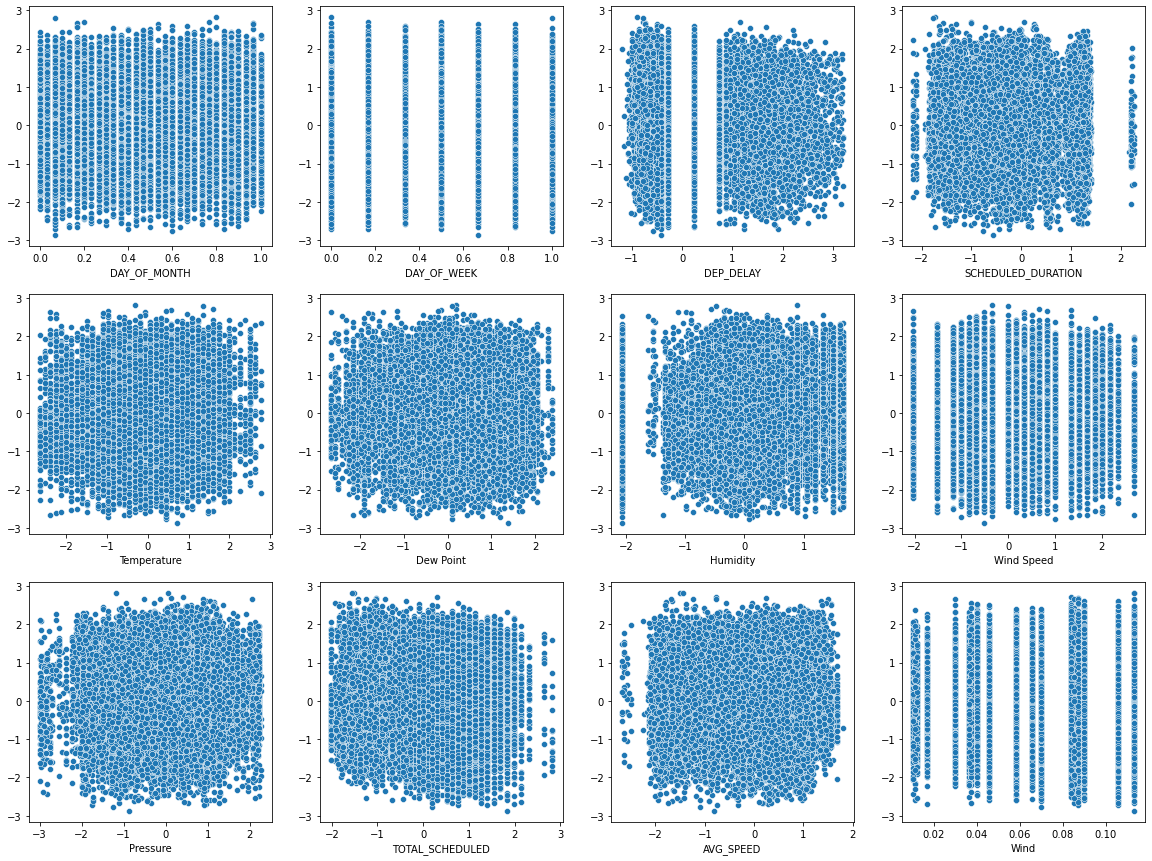

In [95]:
# create subplots of scatter plots
# pass the number of rows in a subplot to 'nrows'
# pass the number of columns in a subplot to 'ncolumns'
# set plot size using 'figsize'
fig, ax = plt.subplots(nrows = 3, ncols= 4, figsize=(20, 15))

# use for loop to create scatter plot for residuals and each independent variable (do not consider the intercept)
# 'ax' assigns axes object to draw the plot onto 
for variable, subplot in zip(X_train.columns[1:15], ax.flatten()):
    sns.scatterplot(X_train[variable], MLR_signi.resid , ax=subplot)

# display the plot
plt.show()

From the plots we see that none of the plots show a specific pattern. Hence, we may conclude that the variables are linearly related to the dependent variable.

**2. Autocorrelation**

We can check the correlation between the residuals using the Durbin-Watson test. The value of the test statistic ranges from 0 to 4. The test statistic value near to 2, represents no autocorrelation. The value of the test statistic between 0 and 2 implies positive autocorrelation and the value between 2 and 4 implies negative autocorrelation.

In [96]:
print(MLR_signi.summary())

                            OLS Regression Results                            
Dep. Variable:               TAXI_OUT   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     146.1
Date:                Sat, 15 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:51:25   Log-Likelihood:                -30679.
No. Observations:               22288   AIC:                         6.139e+04
Df Residuals:                   22273   BIC:                         6.151e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2084      0

From the above summary, we can observe that the value obtained from the Durbin-Watson test statistic is close to 2 (= 2.016). Thus, we conclude that there is no autocorrelation.

**3. Heteroskedasticity**

If the residuals have constant variance across different values of the predicted values, then it is known as Homoskedasticity. The absence of homoskedasticity is known as, heteroskedasticity. One of the assumptions of linear regression is that heteroskedasticity should not be present. 

In [97]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

Breusch-Pagan is one of the tests for detecting heteroskedasticity in the residuals.

In [98]:
# create vector of result parmeters
name = ['f-value','p-value']

# perform Breusch-Pagan test using residuals and independent variables
# compute residuals using 'resid'
# 'exog' returns the independent variables in the model alng with the intercept
test = sms.het_breuschpagan(MLR_signi.resid, MLR_signi.model.exog)

# print the output
# use 'lzip' to zip the column names and test results
# use 'test[2:]' to retrieve the F-statistic and its corresponding p-value 
lzip(name, test[2:])

[('f-value', 13.729913825922491), ('p-value', 3.0525931112710304e-33)]

We observe that the p-value is less than 0.05; thus, we conclude that there is heteroskedasticity present in the data.

**4. Tests for Normality**

#### Jarque bera test

It is used when the data is more than 5000 rows. It uses skewness ans kurtosis to find the normality If skewness =0 and kurtosis =3 we say normally distributed
If pval >0.05 - normally distributed.

In [99]:
MLR_signi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               TAXI_OUT   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     146.1
Date:                Sat, 15 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:51:39   Log-Likelihood:                -30679.
No. Observations:               22288   AIC:                         6.139e+04
Df Residuals:                   22273   BIC:                         6.151e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2084      0.029      7.114      0.000       0.151       0.266
DAY_OF_MONTH          -0.1057      0.023     -4.664      0.000      -0.150      -0.061
DAY_OF_WEEK            0.0808      0.020      4.077      0.000       0.042       0.120
DEP_DELAY              0.0510      0.006      7.864      0.000       0.038       0.064
SCHEDULED_DURATION     0.2506      0.016     15.313      0.000       0.219       0.283
Temperature           -0.2040      0.011    -18.100      0.000      -0.226      -0.182
Dew Point              0.1456      0.013     11.045      0.000       0.120       0.171
Humidity              -0.0279      0.007     -3.988      0.000      -0.042      -0.014
Wind Speed             0.0262      0.010      2.736      0.006       0.007       0.045
Pressure              -0.0538      0.009     -6.252      0.000      -0.071      -0.037
TOTAL_SCHEDULED        0.1686      0.007     25.656      0.000       0.156       0.181
AVG_SPEED             -0.2102      0.016    -12.864      0.000      -0.242      -0.178
Wind                  -2.5550      0.268     -9.528      0.000      -3.081      -2.029
Wind Gust              0.2051      0.023      8.918      0.000       0.160       0.250
Condition             -0.2199      0.072     -3.065      0.002      -0.360      -0.079
==============================================================================
Omnibus:                      367.919   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.854
Skew:                           0.079   Prob(JB):                     6.68e-49
Kurtosis:                       2.538   Cond. No.                         60.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the above test we can see that the p-value is 1.99e-279 (less than 0.05), thus we can say that the residuals are not normally distributed

# Stochastic Gradient Descent

In [101]:
# instantiate the SGDRegressor
# set 'random_state' to generate the same dataset each time you run the code 
sgd = SGDRegressor(random_state = 10)

# build the model on train data 
# use fit() to fit the model
linreg_with_SGD = sgd.fit(X_train, y_train)

In [102]:
update_score_card(algorithm_name = 'linreg_with_SGD',  model = linreg_with_SGD)

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,Rsq_train,Rsq_test,Adj_Rsq_train,Adj_Rsq_test,Train RMSE,Test_RMSE,Train_MAPE,Test_MAPE,Difference_rmse
0,MLR_full_model,-,-,0.084731,0.070273,0.083950,0.067092,0.9581,0.9585,144.008325,143.157312,-0.0004
1,MLR_model_signi,-,-,0.084109,0.071065,0.083492,0.068557,0.9584,0.9580,143.927435,142.797203,0.0004
2,linreg_with_SGD,-,-,0.080115,0.065146,0.079495,0.062622,0.9605,0.9611,144.652294,143.283703,-0.0006


# Ridge regression

In [103]:
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5, 10, 20, 40, 60, 80, 100]}]
 
# initiate the ridge regression model
ridge = Ridge()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the ridge regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
ridge_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Ridge Regression: ', ridge_grid.best_params_, '\n')

Best parameters for Ridge Regression:  {'alpha': 0.1} 



In [104]:
update_score_card(algorithm_name = 'Ridge Regression (using GridSearchCV)', 
                  model = ridge_grid, 
                  alpha = ridge_grid.best_params_.get('alpha'))

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,Rsq_train,Rsq_test,Adj_Rsq_train,Adj_Rsq_test,Train RMSE,Test_RMSE,Train_MAPE,Test_MAPE,Difference_rmse
0,MLR_full_model,-,-,0.084731,0.070273,0.083950,0.067092,0.9581,0.9585,144.008325,143.157312,-0.0004
1,MLR_model_signi,-,-,0.084109,0.071065,0.083492,0.068557,0.9584,0.9580,143.927435,142.797203,0.0004
2,linreg_with_SGD,-,-,0.080115,0.065146,0.079495,0.062622,0.9605,0.9611,144.652294,143.283703,-0.0006
3,Ridge Regression (using GridSearchCV),0.1,-,0.084109,0.071059,0.083492,0.068551,0.9584,0.9580,143.910218,142.771020,0.0004


## Lasso Regression

In [105]:
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20]}]
                     
# 'max_iter':100,500,1000,1500,2000
 
# initiate the lasso regression model 
lasso = Lasso()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the lasso regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
lasso_grid = GridSearchCV(estimator = lasso, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
lasso_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Lasso Regression: ', lasso_grid.best_params_, '\n')

Best parameters for Lasso Regression:  {'alpha': 1e-08} 



In [106]:
update_score_card(algorithm_name = 'Lasso Regression (using GridSearchCV)', 
                  model = lasso_grid, 
                  alpha = lasso_grid.best_params_.get('alpha'))

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,Rsq_train,Rsq_test,Adj_Rsq_train,Adj_Rsq_test,Train RMSE,Test_RMSE,Train_MAPE,Test_MAPE,Difference_rmse
0,MLR_full_model,-,-,0.084731,0.070273,0.083950,0.067092,0.9581,0.9585,144.008325,143.157312,-0.0004
1,MLR_model_signi,-,-,0.084109,0.071065,0.083492,0.068557,0.9584,0.9580,143.927435,142.797203,0.0004
2,linreg_with_SGD,-,-,0.080115,0.065146,0.079495,0.062622,0.9605,0.9611,144.652294,143.283703,-0.0006
3,Ridge Regression (using GridSearchCV),0.1,-,0.084109,0.071059,0.083492,0.068551,0.9584,0.9580,143.910218,142.771020,0.0004
4,Lasso Regression (using GridSearchCV),0.0,-,0.084109,0.071065,0.083492,0.068557,0.9584,0.9580,143.927408,142.797167,0.0004


In [107]:
tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40, 60],
                      'l1_ratio':[0.0001, 0.0002, 0.001, 0.01, 0.1, 0.2]}]

# initiate the elastic net regression model  
enet = ElasticNet()

# use GridSearchCV() to find the optimal value of alpha and l1_ratio
# estimator: pass the elastic net regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
enet_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Elastic Net Regression: ', enet_grid.best_params_, '\n')

Best parameters for Elastic Net Regression:  {'alpha': 0.0001, 'l1_ratio': 0.2} 



In [108]:
update_score_card(algorithm_name = 'Elastic Net Regression (using GridSearchCV)', 
                  model = enet_grid, 
                  alpha = enet_grid.best_params_.get('alpha'), 
                  l1_ratio = enet_grid.best_params_.get('l1_ratio'))

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,Rsq_train,Rsq_test,Adj_Rsq_train,Adj_Rsq_test,Train RMSE,Test_RMSE,Train_MAPE,Test_MAPE,Difference_rmse
0,MLR_full_model,-,-,0.084731,0.070273,0.083950,0.067092,0.9581,0.9585,144.008325,143.157312,-0.0004
1,MLR_model_signi,-,-,0.084109,0.071065,0.083492,0.068557,0.9584,0.9580,143.927435,142.797203,0.0004
2,linreg_with_SGD,-,-,0.080115,0.065146,0.079495,0.062622,0.9605,0.9611,144.652294,143.283703,-0.0006
3,Ridge Regression (using GridSearchCV),0.1,-,0.084109,0.071059,0.083492,0.068551,0.9584,0.9580,143.910218,142.771020,0.0004
4,Lasso Regression (using GridSearchCV),0.0,-,0.084109,0.071065,0.083492,0.068557,0.9584,0.9580,143.927408,142.797167,0.0004
5,Elastic Net Regression (using GridSearchCV),0.0001,0.2,0.084042,0.070902,0.083425,0.068394,0.9585,0.9581,143.636579,142.386089,0.0004


## Classification Approach

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.model_selection import GridSearchCV

In [209]:
df = pd.read_csv('M1_final.csv')

column_names = {"OP_UNIQUE_CARRIER":"CARRIER_CODE",
                "TAIL_NUM":"FLIGHT_NO",
                "DEST":"DESTINATION",
                "CRS_ELAPSED_TIME":"SCHEDULED_DURATION",
                "CRS_DEP_M":"SCHEDULED_DEPARTURE_TIME",
                "DEP_TIME_M":"ACTUAL_DEP_TIME",
                "CRS_ARR_M":"SCHEDULED_ARRIVAL_TIME",
                "sch_dep":"FLT_SCH_ARRIVAL",
                "sch_arr":"FLT_SCH_DEPARTURE"
               }

df = df.rename(column_names, axis=1)

df["Dew Point"] = df["Dew Point"].astype("int64")

df['Wind'].replace(np.nan,'W',inplace=True)

df.drop(["CARRIER_CODE"], axis=1, inplace=True)

df.drop(["FLIGHT_NO"], axis=1, inplace=True)

df["TOTAL_SCHEDULED"] = df["FLT_SCH_ARRIVAL"] + df["FLT_SCH_DEPARTURE"]
df.drop(["FLT_SCH_ARRIVAL"], axis=1, inplace=True)
df.drop(["FLT_SCH_DEPARTURE"], axis=1, inplace=True)

df.drop(["ACTUAL_DEP_TIME"], axis=1, inplace=True)

speed = df.DISTANCE / df.SCHEDULED_DURATION
df['AVG_SPEED'] = round(speed, 2)
df.drop('DISTANCE', axis=1, inplace=True)

df.MONTH.replace({11:0, 12:0.5,1:1}, inplace=True)

minmax = MinMaxScaler()
df.DAY_OF_MONTH = minmax.fit_transform(np.array(df['DAY_OF_MONTH']).reshape(-1,1))
df.DAY_OF_WEEK = minmax.fit_transform(np.array(df.DAY_OF_WEEK).reshape(-1,1))

df.DEP_DELAY = np.cbrt(df.DEP_DELAY)
df.SCHEDULED_DURATION = np.log(df.SCHEDULED_DURATION)

for x in df.index:
    if df['Wind Gust'][x]>0 :
        df['Wind Gust'][x]='YES'
    else: 
        df['Wind Gust'][x]='NO'

df.TOTAL_SCHEDULED = np.power(df.TOTAL_SCHEDULED,3)

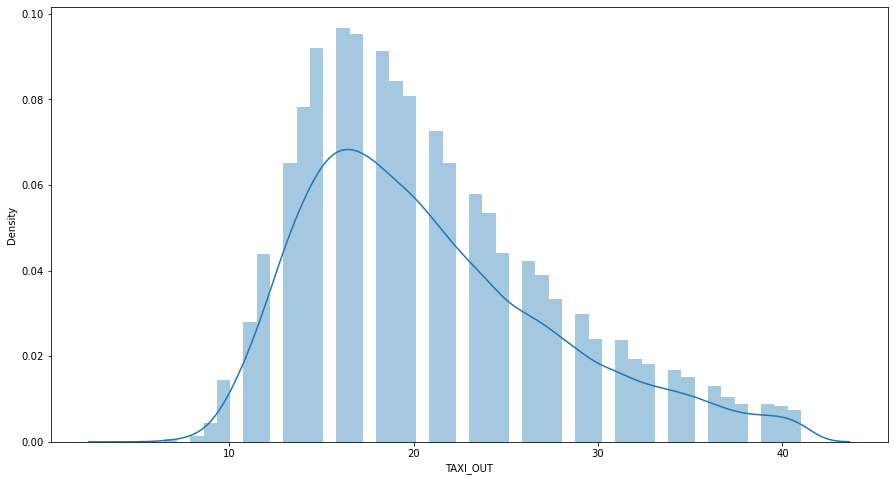

In [111]:
sns.distplot(df.TAXI_OUT)
plt.show()

In [112]:
df.TAXI_OUT.describe()

count    28820.000000
mean        20.858570
std          6.851915
min          5.000000
25%         16.000000
50%         19.000000
75%         25.000000
max         41.000000
Name: TAXI_OUT, dtype: float64

In [210]:
df_Target_2class = pd.DataFrame(index=df.index, columns=['TAXI_OUT'])
for x in df.index:
    if df.TAXI_OUT[x] < 20:
        df_Target_2class['TAXI_OUT'][x] = '0'
    else:
        df_Target_2class['TAXI_OUT'][x] = '1'
    
df_Target_2class.value_counts()

TAXI_OUT
0           14446
1           14374
dtype: int64

In [114]:
df_Target_4class = pd.cut(df.TAXI_OUT, bins=[0,15,20,25,45], labels=['C1', 'C2', 'C3', 'C4'])
df_Target_4class.value_counts()

C2    9303
C1    6819
C4    6612
C3    6086
Name: TAXI_OUT, dtype: int64

In [211]:
df.TAXI_OUT = df_Target_2class

In [212]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print('The updated data:',df.shape)


The updated data: (27903, 19)


In [213]:
X_scaler = StandardScaler()

for x in df.select_dtypes(include=np.number).drop(['MONTH','DAY_OF_MONTH','DAY_OF_WEEK'],axis=1).columns:
    df[x] = X_scaler.fit_transform(np.array(df[x]).reshape(-1,1))

df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DESTINATION,DEP_DELAY,SCHEDULED_DURATION,SCHEDULED_DEPARTURE_TIME,SCHEDULED_ARRIVAL_TIME,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,TAXI_OUT,TOTAL_SCHEDULED,AVG_SPEED
0,0.0,0.0,0.666667,CHS,-0.278335,-0.790591,-1.689047,-1.336559,0.831059,0.278731,-0.008036,W,2.180466,YES,-0.796221,Fair / Windy,0,-1.866982,0.096220
1,0.0,0.0,0.666667,LAX,-0.739114,1.146958,-1.635690,-1.096574,0.831059,0.278731,-0.008036,W,2.180466,YES,-0.796221,Fair / Windy,0,-1.866982,1.179003
2,0.0,0.0,0.666667,FLL,1.952524,-0.121920,-1.765748,-1.238252,0.831059,0.278731,-0.008036,W,2.180466,YES,-0.796221,Fair / Windy,1,-1.866982,0.644643
3,0.0,0.0,0.666667,MCO,-0.409523,-0.253691,-1.619016,-1.148619,0.831059,0.278731,-0.008036,W,2.180466,YES,-0.796221,Fair / Windy,0,-1.866982,0.440742
4,0.0,0.0,0.666667,ATL,-0.574810,-0.588703,-1.568993,-1.189098,0.573386,0.110955,-0.008036,W,2.012080,YES,-0.624496,Fair / Windy,0,-1.866982,0.335276


In [118]:
df.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,SCHEDULED_DURATION,SCHEDULED_DEPARTURE_TIME,SCHEDULED_ARRIVAL_TIME,Temperature,Dew Point,Humidity,Wind Speed,Pressure,TOTAL_SCHEDULED,AVG_SPEED
count,27903.000000,27903.000000,27903.000000,2.790300e+04,2.790300e+04,2.790300e+04,2.790300e+04,2.790300e+04,2.790300e+04,2.790300e+04,2.790300e+04,2.790300e+04,2.790300e+04,2.790300e+04
mean,0.493495,0.500049,0.497133,-4.912911e-15,2.067578e-16,-1.081297e-16,1.215703e-16,1.127623e-15,5.905011e-15,-1.109451e-15,-2.583796e-15,3.466647e-15,3.193804e-15,-8.692947e-16
std,0.411864,0.294322,0.332232,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00
min,0.000000,0.000000,0.000000,-1.187868e+00,-2.164707e+00,-1.765748e+00,-2.629012e+00,-2.647528e+00,-2.657350e+00,-2.061149e+00,-2.029206e+00,-2.994293e+00,-2.015333e+00,-2.674017e+00
25%,0.000000,0.233333,0.166667,-6.907556e-01,-7.905913e-01,-9.620562e-01,-7.033441e-01,-7.149798e-01,-6.440375e-01,-4.785407e-01,-6.821109e-01,-7.275309e-01,-8.956353e-01,-8.529727e-01
50%,0.500000,0.500000,0.500000,-5.015489e-01,-4.545519e-02,8.507716e-02,1.950424e-02,5.803947e-02,2.706677e-02,3.473760e-02,-8.563273e-03,6.240126e-02,9.530311e-02,3.071519e-01
75%,1.000000,0.766667,0.833333,7.311147e-01,1.122969e+00,8.820991e-01,8.175288e-01,7.022222e-01,6.981710e-01,7.191086e-01,6.649843e-01,7.492988e-01,7.576000e-01,8.836986e-01
max,1.000000,1.000000,1.000000,3.187844e+00,2.261807e+00,2.029277e+00,1.528812e+00,2.763607e+00,2.375932e+00,1.660119e+00,2.685627e+00,2.260473e+00,2.811107e+00,1.797736e+00


In [214]:
for x in df.select_dtypes(include='object').drop(['Wind Gust','TAXI_OUT'],axis=1).columns:
    df[x] = df[x].replace(df[x].value_counts(normalize=True))
    
df['Wind Gust'].replace({'YES':1, 'NO':0}, inplace=True)
df.TAXI_OUT.replace({'1':1, '0':0}, inplace=True)
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DESTINATION,DEP_DELAY,SCHEDULED_DURATION,SCHEDULED_DEPARTURE_TIME,SCHEDULED_ARRIVAL_TIME,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,TAXI_OUT,TOTAL_SCHEDULED,AVG_SPEED
0,0.0,0.0,0.666667,0.012974,-0.278335,-0.790591,-1.689047,-1.336559,0.831059,0.278731,-0.008036,0.11307,2.180466,1,-0.796221,0.027166,0,-1.866982,0.096220
1,0.0,0.0,0.666667,0.103824,-0.739114,1.146958,-1.635690,-1.096574,0.831059,0.278731,-0.008036,0.11307,2.180466,1,-0.796221,0.027166,0,-1.866982,1.179003
2,0.0,0.0,0.666667,0.034799,1.952524,-0.121920,-1.765748,-1.238252,0.831059,0.278731,-0.008036,0.11307,2.180466,1,-0.796221,0.027166,1,-1.866982,0.644643
3,0.0,0.0,0.666667,0.033007,-0.409523,-0.253691,-1.619016,-1.148619,0.831059,0.278731,-0.008036,0.11307,2.180466,1,-0.796221,0.027166,0,-1.866982,0.440742
4,0.0,0.0,0.666667,0.027667,-0.574810,-0.588703,-1.568993,-1.189098,0.573386,0.110955,-0.008036,0.11307,2.012080,1,-0.624496,0.027166,0,-1.866982,0.335276


In [215]:
y = df['TAXI_OUT']
x = df.drop(columns='TAXI_OUT')

print(y.shape)
x.head()

(27903,)


,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DESTINATION,DEP_DELAY,SCHEDULED_DURATION,SCHEDULED_DEPARTURE_TIME,SCHEDULED_ARRIVAL_TIME,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,TOTAL_SCHEDULED,AVG_SPEED
0,0.0,0.0,0.666667,0.012974,-0.278335,-0.790591,-1.689047,-1.336559,0.831059,0.278731,-0.008036,0.11307,2.180466,1,-0.796221,0.027166,-1.866982,0.096220
1,0.0,0.0,0.666667,0.103824,-0.739114,1.146958,-1.635690,-1.096574,0.831059,0.278731,-0.008036,0.11307,2.180466,1,-0.796221,0.027166,-1.866982,1.179003
2,0.0,0.0,0.666667,0.034799,1.952524,-0.121920,-1.765748,-1.238252,0.831059,0.278731,-0.008036,0.11307,2.180466,1,-0.796221,0.027166,-1.866982,0.644643
3,0.0,0.0,0.666667,0.033007,-0.409523,-0.253691,-1.619016,-1.148619,0.831059,0.278731,-0.008036,0.11307,2.180466,1,-0.796221,0.027166,-1.866982,0.440742
4,0.0,0.0,0.666667,0.027667,-0.574810,-0.588703,-1.568993,-1.189098,0.573386,0.110955,-0.008036,0.11307,2.012080,1,-0.624496,0.027166,-1.866982,0.335276


In [216]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size = 0.2)

print('X_train', X_train.shape)
print('y_train', y_train.shape)

print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (22322, 18)
y_train (22322,)
X_test (5581, 18)
y_test (5581,)


In [122]:
score_card_class = pd.DataFrame(columns=['Model_Name', 'Train_F1', 'Test_F1', 'Bias', 'Variance'])

In [123]:
def classification_performance(model):
    print('Train - Classification Report : \n', classification_report(y_train, model.predict(X_train)))
    print()
    print('Test - Classification Report : \n', classification_report(y_test, model.predict(X_test)))

    scores = cross_val_score(estimator=model, X=X_train, y=y_train, cv=5, scoring='f1_weighted', verbose=0)
    print('Cross Validation Scores : ', scores)

    bias = 1 - np.mean(scores)
    variance = np.std(scores)/np.mean(scores)
    print('Bias : ', bias)
    print('Variance : ', variance)

### Logistic Regression

In [124]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

classification_performance(log_reg)

Train - Classification Report : 
               precision    recall  f1-score   support

           0       0.60      0.61      0.60     11236
           1       0.59      0.58      0.59     11086

    accuracy                           0.60     22322
   macro avg       0.60      0.60      0.60     22322
weighted avg       0.60      0.60      0.60     22322


Test - Classification Report : 
               precision    recall  f1-score   support

           0       0.59      0.60      0.60      2786
           1       0.60      0.59      0.59      2795

    accuracy                           0.60      5581
   macro avg       0.60      0.60      0.60      5581
weighted avg       0.60      0.60      0.60      5581

Cross Validation Scores :  [0.59947781 0.58630208 0.59448569 0.59150174 0.59021322]
Bias :  0.4076038917899856
Variance :  0.007443520235991927


In [125]:
fpr, tpr, threshold = roc_curve(y_train, log_reg.predict_proba(X_train)[:,1])
print(fpr, tpr, threshold)

[0.       0.       0.       ... 0.999911 0.999911 1.      ] [0.00000000e+00 9.02038607e-05 1.80407721e-03 ... 9.99909796e-01
 1.00000000e+00 1.00000000e+00] [1.85153995 0.85153995 0.80310611 ... 0.18676375 0.18563854 0.17761171]


In [126]:
roc_df = pd.DataFrame({'fpr':fpr, 'tpr':tpr, 'threshold':threshold})
roc_df['T-F'] = tpr-fpr
roc_df[roc_df['T-F'] == roc_df['T-F'].max()]

,fpr,tpr,threshold,T-F
5174,0.393467,0.58416,0.499916,0.190693


In [127]:
fpr = [ fpr[x*10] for x in range(int(len(fpr)/10))]
tpr = [ tpr[x*10] for x in range(int(len(tpr)/10))]
threshold = [ threshold[x*10] for x in range(int(len(threshold)/10))]

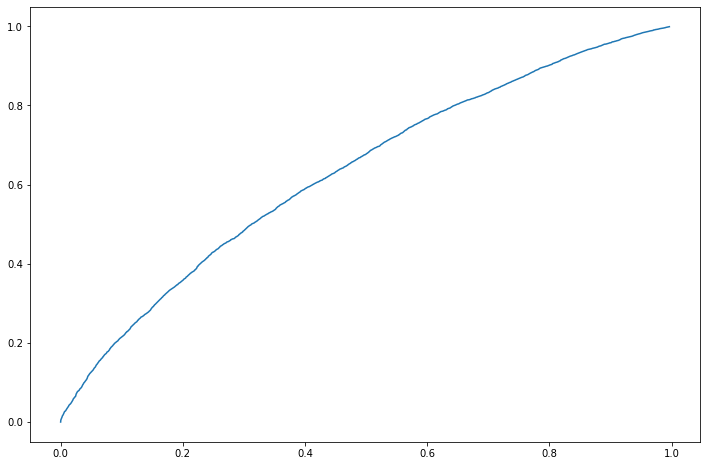

In [219]:
plt.figure(figsize=(12,8))
sns.lineplot(x=fpr, y=tpr )
plt.show()

In [129]:
# Feature Selection
!pip install mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

In [130]:
sfs_forward = sfs(estimator=LogisticRegression(), k_features=(5,18), scoring='f1_weighted')
sfs_forward = sfs_forward.fit(X_train, y_train)

In [131]:
print('Features selected by Forward selector : \n', sfs_forward.k_feature_names_)
print('K Score : \n', sfs_forward.k_score_)

Features selected by Forward selector : 
 ('MONTH', 'DAY_OF_WEEK', 'SCHEDULED_DEPARTURE_TIME', 'SCHEDULED_ARRIVAL_TIME', 'Temperature', 'Dew Point', 'Humidity', 'Wind', 'Wind Gust', 'Pressure', 'Condition', 'TOTAL_SCHEDULED')
K Score : 
 0.5944465030232772


In [132]:
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=12)
rfe = rfe.fit(X_train, y_train)
rfe.ranking_

array([3, 1, 1, 1, 2, 1, 6, 5, 1, 1, 4, 1, 7, 1, 1, 1, 1, 1])

In [133]:
X_train.columns[rfe.ranking_ == 1]

Index(['DAY_OF_MONTH', 'DAY_OF_WEEK', 'DESTINATION', 'SCHEDULED_DURATION', 'Temperature', 'Dew Point', 'Wind', 'Wind Gust', 'Pressure', 'Condition', 'TOTAL_SCHEDULED', 'AVG_SPEED'], dtype='object')

In [134]:
log_reg = LogisticRegression()
log_reg.fit(X_train[X_train.columns[rfe.ranking_ == 1]],y_train)

print('Train - Classification Report : \n', classification_report(y_train, log_reg.predict(X_train[X_train.columns[rfe.ranking_ == 1]])))
print()
print('Test - Classification Report : \n', classification_report(y_test, log_reg.predict(X_test[X_train.columns[rfe.ranking_ == 1]])))

scores = cross_val_score(estimator=log_reg, X=X_train[X_train.columns[rfe.ranking_ == 1]], y=y_train, cv=5, scoring='f1_weighted', verbose=0)
print('Cross Validation Scores : ', scores)

bias = 1 - np.mean(scores)
variance = np.std(scores)/np.mean(scores)
print('Bias : ', bias)
print('Variance : ', variance)

Train - Classification Report : 
               precision    recall  f1-score   support

           0       0.59      0.60      0.59     11236
           1       0.59      0.58      0.58     11086

    accuracy                           0.59     22322
   macro avg       0.59      0.59      0.59     22322
weighted avg       0.59      0.59      0.59     22322


Test - Classification Report : 
               precision    recall  f1-score   support

           0       0.59      0.60      0.59      2786
           1       0.59      0.59      0.59      2795

    accuracy                           0.59      5581
   macro avg       0.59      0.59      0.59      5581
weighted avg       0.59      0.59      0.59      5581

Cross Validation Scores :  [0.59505    0.58855822 0.58864246 0.58640676 0.58736278]
Bias :  0.41079595764439514
Variance :  0.00515473714251427


### Decision Tree Algorithm

In [135]:
Dtree = DecisionTreeClassifier()
params = { 'max_depth': np.arange(3,24) }

Gs_Dtree = GridSearchCV(Dtree, param_grid=params, cv=4, scoring='f1_weighted')
Gs_Dtree.fit(X_train, y_train)
Gs_Dtree.best_params_

{'max_depth': 12}

In [136]:
Dtree_best = DecisionTreeClassifier(max_depth=12)
Dtree_best.fit(X_train, y_train)

classification_performance(Dtree_best)

Train - Classification Report : 
               precision    recall  f1-score   support

           0       0.72      0.79      0.75     11236
           1       0.76      0.69      0.73     11086

    accuracy                           0.74     22322
   macro avg       0.74      0.74      0.74     22322
weighted avg       0.74      0.74      0.74     22322


Test - Classification Report : 
               precision    recall  f1-score   support

           0       0.61      0.68      0.64      2786
           1       0.64      0.56      0.60      2795

    accuracy                           0.62      5581
   macro avg       0.62      0.62      0.62      5581
weighted avg       0.62      0.62      0.62      5581

Cross Validation Scores :  [0.61305553 0.61857283 0.59496672 0.60525082 0.60942735]
Bias :  0.3917453494270482
Variance :  0.013079862972819677


### Bagging - Random Forest

In [137]:
RF = RandomForestClassifier()

params = { 'n_estimators':[10, 50, 100, 500, 1000], 'max_features': [0.4, 0.5, 0.6, 0.7, 0.8], 'max_samples': [0.4, 0.5, 0.6, 0.7, 0.8] }

Gs_RF = GridSearchCV(RF, param_grid=params, cv=4, scoring='f1_weighted')
Gs_RF.fit(X_train, y_train)
Gs_RF.best_params_

{'max_features': 0.6, 'max_samples': 0.5, 'n_estimators': 1000}

In [217]:
tuned_rf = RandomForestClassifier(n_estimators=1000, max_features=0.6, max_samples=0.5)
tuned_rf.fit(X_train, y_train)

RandomForestClassifier(max_features=0.6, max_samples=0.5, n_estimators=1000)

In [218]:
classification_performance(tuned_rf)

Train - Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     11236
           1       0.99      0.99      0.99     11086

    accuracy                           0.99     22322
   macro avg       0.99      0.99      0.99     22322
weighted avg       0.99      0.99      0.99     22322


Test - Classification Report : 
               precision    recall  f1-score   support

           0       0.68      0.70      0.69      2786
           1       0.69      0.67      0.68      2795

    accuracy                           0.68      5581
   macro avg       0.68      0.68      0.68      5581
weighted avg       0.68      0.68      0.68      5581

Cross Validation Scores :  [0.67155663 0.67636778 0.6601206  0.66971335 0.66213117]
Bias :  0.332022094185884
Variance :  0.009035340030150937


## Boosting

## ADA Boost

In [138]:
ada = AdaBoostClassifier(random_state=10)  

params = {'base_estimator':[LogisticRegression(),KNeighborsClassifier(n_neighbors=40),DecisionTreeClassifier(max_depth=2)],
         'n_estimators':[50,100,150,200,250]}

grd_srch = GridSearchCV(AdaBoostClassifier(random_state=10),param_grid=params,cv=4,scoring='f1_weighted')
grd_srch.fit(X_train,y_train)
grd_srch.best_params_

{'base_estimator': DecisionTreeClassifier(max_depth=2), 'n_estimators': 200}

In [139]:
tuned_ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),n_estimators=200,random_state=10)  
tuned_ada.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   n_estimators=200, random_state=10)

In [140]:
classification_performance(tuned_ada)

Train - Classification Report : 
               precision    recall  f1-score   support

           0       0.70      0.73      0.71     11236
           1       0.71      0.68      0.70     11086

    accuracy                           0.71     22322
   macro avg       0.71      0.71      0.71     22322
weighted avg       0.71      0.71      0.71     22322


Test - Classification Report : 
               precision    recall  f1-score   support

           0       0.65      0.67      0.66      2786
           1       0.66      0.64      0.65      2795

    accuracy                           0.66      5581
   macro avg       0.66      0.66      0.66      5581
weighted avg       0.66      0.66      0.66      5581

Cross Validation Scores :  [0.66188694 0.64924479 0.631591   0.65544482 0.63908191]
Bias :  0.35255010923819663
Variance :  0.016878392908448975


## Gradient boosting

In [141]:
params = {'n_estimators':[50,100,150,200,250],
          'learning_rate': [0.1, 0.2, 0.3],
          'max_depth': range(3,5)}

grd_srch = GridSearchCV(GradientBoostingClassifier(random_state=10),param_grid=params,cv=4,scoring='f1_weighted')
grd_srch.fit(X_train,y_train)
grd_srch.best_params_

{'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 250}

In [142]:
tuned_gb  = GradientBoostingClassifier(n_estimators=250,learning_rate=0.2,max_depth=4,random_state=10)  

tuned_gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=4, n_estimators=250,
                           random_state=10)

In [143]:
classification_performance(tuned_gb)

Train - Classification Report : 
               precision    recall  f1-score   support

           0       0.77      0.81      0.79     11236
           1       0.79      0.75      0.77     11086

    accuracy                           0.78     22322
   macro avg       0.78      0.78      0.78     22322
weighted avg       0.78      0.78      0.78     22322


Test - Classification Report : 
               precision    recall  f1-score   support

           0       0.67      0.70      0.68      2786
           1       0.68      0.66      0.67      2795

    accuracy                           0.68      5581
   macro avg       0.68      0.68      0.68      5581
weighted avg       0.68      0.68      0.68      5581

Cross Validation Scores :  [0.66515714 0.66723748 0.66432517 0.67476847 0.66045844]
Bias :  0.3336106591456932
Variance :  0.0070985639272920665


## XG BOOST

In [145]:
!pip install xgboost

In [146]:
from xgboost import XGBClassifier
params = {'n_estimators':[50,100,150,200,250],
          'learning_rate': [0.1, 0.2, 0.3],'max_depth': range(3,5),'gamma': [0, 1, 2, 3, 4]}

grd_srch = GridSearchCV(XGBClassifier(random_state=10),param_grid=params,cv=4,scoring='f1_weighted')
grd_srch.fit(X_train,y_train)
grd_srch.best_params_

[14:18:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:18:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:18:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:18:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:18:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:19:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:19:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:19:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:19:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:19:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:19:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:19:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:19:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:19:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:19:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:19:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:19:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:19:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:19:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:19:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:19:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:19:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:19:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:19:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:19:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:20:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:20:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:20:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:20:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:20:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:20:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:20:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:20:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:20:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:20:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:20:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:20:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:20:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:20:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:20:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:20:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:20:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:20:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:20:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:20:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:21:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:21:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:21:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:21:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:21:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:21:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:21:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:21:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:21:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:21:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:21:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:21:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:21:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:21:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:21:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:21:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:21:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:21:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:21:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:21:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:22:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:22:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:22:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:22:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:22:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:22:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:22:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:22:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

{'gamma': 0, 'learning_rate': 0.3, 'max_depth': 4, 'n_estimators': 250}

In [147]:
tuned_xgboost = XGBClassifier(gamma=0,learning_rate=0.3,max_depth=4,n_estimators=250,random_state=10)
tuned_xgboost.fit(X_train, y_train)

[14:22:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=250, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=10,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [148]:
classification_performance(tuned_xgboost)

Train - Classification Report : 
               precision    recall  f1-score   support

           0       0.79      0.82      0.81     11236
           1       0.81      0.78      0.79     11086

    accuracy                           0.80     22322
   macro avg       0.80      0.80      0.80     22322
weighted avg       0.80      0.80      0.80     22322


Test - Classification Report : 
               precision    recall  f1-score   support

           0       0.67      0.70      0.69      2786
           1       0.69      0.66      0.68      2795

    accuracy                           0.68      5581
   macro avg       0.68      0.68      0.68      5581
weighted avg       0.68      0.68      0.68      5581

[14:22:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd li

## voting classifier

In [149]:
models = [('lr',LogisticRegression()),
          ('dt',DecisionTreeClassifier(max_depth=2)),
          ('rf',RandomForestClassifier(max_depth=2)),
          ('knn',KNeighborsClassifier()),
          ('gb',GradientBoostingClassifier())]

vc  = VotingClassifier(models,voting='soft')

vc.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier(max_depth=2)),
                             ('rf', RandomForestClassifier(max_depth=2)),
                             ('knn', KNeighborsClassifier()),
                             ('gb', GradientBoostingClassifier())],
                 voting='soft')

In [150]:
classification_performance(vc)

Train - Classification Report : 
               precision    recall  f1-score   support

           0       0.72      0.73      0.72     11236
           1       0.72      0.71      0.71     11086

    accuracy                           0.72     22322
   macro avg       0.72      0.72      0.72     22322
weighted avg       0.72      0.72      0.72     22322


Test - Classification Report : 
               precision    recall  f1-score   support

           0       0.63      0.65      0.64      2786
           1       0.64      0.63      0.63      2795

    accuracy                           0.64      5581
   macro avg       0.64      0.64      0.64      5581
weighted avg       0.64      0.64      0.64      5581

Cross Validation Scores :  [0.63582327 0.62240192 0.61757799 0.63740475 0.63010237]
Bias :  0.37133794075837767
Variance :  0.01215258380970611


## stacking classifier

In [151]:
models = [('lr',LogisticRegression()),('dt',DecisionTreeClassifier(max_depth=2)),
          ('rf',RandomForestClassifier(max_depth=2)),('knn',KNeighborsClassifier()),('gb',GradientBoostingClassifier())]

stacks = StackingClassifier(estimators = models, final_estimator = AdaBoostClassifier())
stacks.fit(X_train,y_train)

StackingClassifier(estimators=[('lr', LogisticRegression()),
                               ('dt', DecisionTreeClassifier(max_depth=2)),
                               ('rf', RandomForestClassifier(max_depth=2)),
                               ('knn', KNeighborsClassifier()),
                               ('gb', GradientBoostingClassifier())],
                   final_estimator=AdaBoostClassifier())

In [152]:
classification_performance(stacks)

Train - Classification Report : 
               precision    recall  f1-score   support

           0       0.70      0.76      0.73     11236
           1       0.73      0.67      0.70     11086

    accuracy                           0.71     22322
   macro avg       0.71      0.71      0.71     22322
weighted avg       0.71      0.71      0.71     22322


Test - Classification Report : 
               precision    recall  f1-score   support

           0       0.65      0.70      0.68      2786
           1       0.68      0.62      0.65      2795

    accuracy                           0.66      5581
   macro avg       0.66      0.66      0.66      5581
weighted avg       0.66      0.66      0.66      5581

Cross Validation Scores :  [0.64849802 0.6426664  0.6437963  0.64532766 0.64148944]
Bias :  0.3556444372274761
Variance :  0.0037687281368417517


### 4-Class approach

In [158]:
df = pd.read_csv('M1_final.csv')

column_names = {"OP_UNIQUE_CARRIER":"CARRIER_CODE",
                "TAIL_NUM":"FLIGHT_NO",
                "DEST":"DESTINATION",
                "CRS_ELAPSED_TIME":"SCHEDULED_DURATION",
                "CRS_DEP_M":"SCHEDULED_DEPARTURE_TIME",
                "DEP_TIME_M":"ACTUAL_DEP_TIME",
                "CRS_ARR_M":"SCHEDULED_ARRIVAL_TIME",
                "sch_dep":"FLT_SCH_ARRIVAL",
                "sch_arr":"FLT_SCH_DEPARTURE"
               }

df = df.rename(column_names, axis=1)

df["Dew Point"] = df["Dew Point"].astype("int64")

df['Wind'].replace(np.nan,'W',inplace=True)

df.drop(["CARRIER_CODE"], axis=1, inplace=True)

df.drop(["FLIGHT_NO"], axis=1, inplace=True)

df["TOTAL_SCHEDULED"] = df["FLT_SCH_ARRIVAL"] + df["FLT_SCH_DEPARTURE"]
df.drop(["FLT_SCH_ARRIVAL"], axis=1, inplace=True)
df.drop(["FLT_SCH_DEPARTURE"], axis=1, inplace=True)

df.drop(["ACTUAL_DEP_TIME"], axis=1, inplace=True)

speed = df.DISTANCE / df.SCHEDULED_DURATION
df['AVG_SPEED'] = round(speed, 2)
df.drop('DISTANCE', axis=1, inplace=True)

df.MONTH.replace({11:0, 12:0.5,1:1}, inplace=True)

minmax = MinMaxScaler()
df.DAY_OF_MONTH = minmax.fit_transform(np.array(df['DAY_OF_MONTH']).reshape(-1,1))
df.DAY_OF_WEEK = minmax.fit_transform(np.array(df.DAY_OF_WEEK).reshape(-1,1))

df.DEP_DELAY = np.cbrt(df.DEP_DELAY)
df.SCHEDULED_DURATION = np.log(df.SCHEDULED_DURATION)

for x in df.index:
    if df['Wind Gust'][x]>0 :
        df['Wind Gust'][x]='YES'
    else: 
        df['Wind Gust'][x]='NO'

df.TOTAL_SCHEDULED = np.power(df.TOTAL_SCHEDULED,3)

In [159]:
df_Target_4class = pd.cut(df.TAXI_OUT, bins=[0,15,20,25,45], labels=['0', '1', '2', '3'])
df_Target_4class.value_counts()

1    9303
0    6819
3    6612
2    6086
Name: TAXI_OUT, dtype: int64

In [171]:
df.TAXI_OUT = df_Target_4class.astype('object')

In [172]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print('The updated data:',df.shape)

The updated data: (27903, 19)


In [173]:
X_scaler = StandardScaler()

for x in df.select_dtypes(include=np.number).drop(['MONTH','DAY_OF_MONTH','DAY_OF_WEEK'],axis=1).columns:
    df[x] = X_scaler.fit_transform(np.array(df[x]).reshape(-1,1))

df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DESTINATION,DEP_DELAY,SCHEDULED_DURATION,SCHEDULED_DEPARTURE_TIME,SCHEDULED_ARRIVAL_TIME,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,TAXI_OUT,TOTAL_SCHEDULED,AVG_SPEED
0,0.0,0.0,0.666667,CHS,-0.278335,-0.790591,-1.689047,-1.336559,0.831059,0.278731,-0.008036,W,2.180466,YES,-0.796221,Fair / Windy,0,-1.866982,0.096220
1,0.0,0.0,0.666667,LAX,-0.739114,1.146958,-1.635690,-1.096574,0.831059,0.278731,-0.008036,W,2.180466,YES,-0.796221,Fair / Windy,0,-1.866982,1.179003
2,0.0,0.0,0.666667,FLL,1.952524,-0.121920,-1.765748,-1.238252,0.831059,0.278731,-0.008036,W,2.180466,YES,-0.796221,Fair / Windy,2,-1.866982,0.644643
3,0.0,0.0,0.666667,MCO,-0.409523,-0.253691,-1.619016,-1.148619,0.831059,0.278731,-0.008036,W,2.180466,YES,-0.796221,Fair / Windy,0,-1.866982,0.440742
4,0.0,0.0,0.666667,ATL,-0.574810,-0.588703,-1.568993,-1.189098,0.573386,0.110955,-0.008036,W,2.012080,YES,-0.624496,Fair / Windy,0,-1.866982,0.335276


In [174]:
for x in df.select_dtypes(include='object').drop(['Wind Gust','TAXI_OUT'],axis=1).columns:
    df[x] = df[x].replace(df[x].value_counts(normalize=True))
    
df['Wind Gust'].replace({'YES':1, 'NO':0}, inplace=True)
df.TAXI_OUT.replace({'1':1, '0':0, '2':2, '3':3}, inplace=True)
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DESTINATION,DEP_DELAY,SCHEDULED_DURATION,SCHEDULED_DEPARTURE_TIME,SCHEDULED_ARRIVAL_TIME,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,TAXI_OUT,TOTAL_SCHEDULED,AVG_SPEED
0,0.0,0.0,0.666667,0.012974,-0.278335,-0.790591,-1.689047,-1.336559,0.831059,0.278731,-0.008036,0.11307,2.180466,1,-0.796221,0.027166,0,-1.866982,0.096220
1,0.0,0.0,0.666667,0.103824,-0.739114,1.146958,-1.635690,-1.096574,0.831059,0.278731,-0.008036,0.11307,2.180466,1,-0.796221,0.027166,0,-1.866982,1.179003
2,0.0,0.0,0.666667,0.034799,1.952524,-0.121920,-1.765748,-1.238252,0.831059,0.278731,-0.008036,0.11307,2.180466,1,-0.796221,0.027166,2,-1.866982,0.644643
3,0.0,0.0,0.666667,0.033007,-0.409523,-0.253691,-1.619016,-1.148619,0.831059,0.278731,-0.008036,0.11307,2.180466,1,-0.796221,0.027166,0,-1.866982,0.440742
4,0.0,0.0,0.666667,0.027667,-0.574810,-0.588703,-1.568993,-1.189098,0.573386,0.110955,-0.008036,0.11307,2.012080,1,-0.624496,0.027166,0,-1.866982,0.335276


In [175]:
y = df['TAXI_OUT']
x = df.drop(columns='TAXI_OUT')

print(y.shape)
x.head()

(27903,)


,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DESTINATION,DEP_DELAY,SCHEDULED_DURATION,SCHEDULED_DEPARTURE_TIME,SCHEDULED_ARRIVAL_TIME,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,TOTAL_SCHEDULED,AVG_SPEED
0,0.0,0.0,0.666667,0.012974,-0.278335,-0.790591,-1.689047,-1.336559,0.831059,0.278731,-0.008036,0.11307,2.180466,1,-0.796221,0.027166,-1.866982,0.096220
1,0.0,0.0,0.666667,0.103824,-0.739114,1.146958,-1.635690,-1.096574,0.831059,0.278731,-0.008036,0.11307,2.180466,1,-0.796221,0.027166,-1.866982,1.179003
2,0.0,0.0,0.666667,0.034799,1.952524,-0.121920,-1.765748,-1.238252,0.831059,0.278731,-0.008036,0.11307,2.180466,1,-0.796221,0.027166,-1.866982,0.644643
3,0.0,0.0,0.666667,0.033007,-0.409523,-0.253691,-1.619016,-1.148619,0.831059,0.278731,-0.008036,0.11307,2.180466,1,-0.796221,0.027166,-1.866982,0.440742
4,0.0,0.0,0.666667,0.027667,-0.574810,-0.588703,-1.568993,-1.189098,0.573386,0.110955,-0.008036,0.11307,2.012080,1,-0.624496,0.027166,-1.866982,0.335276


In [176]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size = 0.2)

print('X_train', X_train.shape)
print('y_train', y_train.shape)

print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (22322, 18)
y_train (22322,)
X_test (5581, 18)
y_test (5581,)


### Decision Tree Algorithm

In [184]:
Dtree = DecisionTreeClassifier()
params = { 'max_depth': np.arange(3,24) }

Gs_Dtree = GridSearchCV(Dtree, param_grid=params, cv=4, scoring='f1_weighted')
Gs_Dtree.fit(X_train, y_train)
Gs_Dtree.best_params_

{'max_depth': 16}

In [200]:
Dtree_best = DecisionTreeClassifier(max_depth=16)
Dtree_best.fit(X_train, y_train)

classification_performance(Dtree_best)

Train - Classification Report : 
               precision    recall  f1-score   support

           0       0.68      0.68      0.68      5299
           1       0.63      0.80      0.70      7250
           2       0.76      0.59      0.66      4692
           3       0.86      0.71      0.78      5081

    accuracy                           0.70     22322
   macro avg       0.73      0.69      0.70     22322
weighted avg       0.72      0.70      0.70     22322


Test - Classification Report : 
               precision    recall  f1-score   support

           0       0.35      0.33      0.34      1331
           1       0.37      0.48      0.41      1774
           2       0.25      0.20      0.22      1163
           3       0.44      0.35      0.39      1313

    accuracy                           0.36      5581
   macro avg       0.35      0.34      0.34      5581
weighted avg       0.36      0.36      0.35      5581

Cross Validation Scores :  [0.34095932 0.34730833 0.33580241 0

### Bagging - Random Forest

In [186]:
RF = RandomForestClassifier()

params = { 'n_estimators':[10, 50, 100, 500, 1000], 'max_features': [0.4, 0.5, 0.6, 0.7, 0.8], 'max_samples': [0.4, 0.5, 0.6, 0.7, 0.8] }

Gs_RF = GridSearchCV(RF, param_grid=params, cv=4, scoring='f1_weighted')
Gs_RF.fit(X_train, y_train)
Gs_RF.best_params_

{'max_features': 0.8, 'max_samples': 0.5, 'n_estimators': 1000}

In [207]:
tuned_rf = RandomForestClassifier(n_estimators=1000, max_features=0.8, max_samples=0.5)
tuned_rf.fit(X_train, y_train)

RandomForestClassifier(max_features=0.8, max_samples=0.5, n_estimators=1000)

In [208]:
classification_performance(tuned_rf)

Train - Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5299
           1       1.00      1.00      1.00      7250
           2       1.00      0.99      1.00      4692
           3       0.99      1.00      1.00      5081

    accuracy                           1.00     22322
   macro avg       1.00      1.00      1.00     22322
weighted avg       1.00      1.00      1.00     22322


Test - Classification Report : 
               precision    recall  f1-score   support

           0       0.42      0.35      0.38      1331
           1       0.39      0.54      0.45      1774
           2       0.29      0.17      0.21      1163
           3       0.53      0.52      0.53      1313

    accuracy                           0.41      5581
   macro avg       0.41      0.40      0.39      5581
weighted avg       0.41      0.41      0.40      5581

Cross Validation Scores :  [0.39347249 0.39129796 0.39048692 0

## Boosting

## ADA Boost

In [187]:
ada = AdaBoostClassifier(random_state=10)  

params = {'base_estimator':[LogisticRegression(),KNeighborsClassifier(n_neighbors=40),DecisionTreeClassifier(max_depth=2)],
         'n_estimators':[50,100,150,200,250]}

grd_srch = GridSearchCV(AdaBoostClassifier(random_state=10),param_grid=params,cv=4,scoring='f1_weighted')
grd_srch.fit(X_train,y_train)
grd_srch.best_params_

{'base_estimator': DecisionTreeClassifier(max_depth=2), 'n_estimators': 250}

In [201]:
tuned_ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),n_estimators=250,random_state=10)  
tuned_ada.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   n_estimators=250, random_state=10)

In [202]:
classification_performance(tuned_ada)

Train - Classification Report : 
               precision    recall  f1-score   support

           0       0.47      0.43      0.45      5299
           1       0.42      0.57      0.48      7250
           2       0.39      0.19      0.26      4692
           3       0.53      0.54      0.54      5081

    accuracy                           0.45     22322
   macro avg       0.45      0.44      0.43     22322
weighted avg       0.45      0.45      0.44     22322


Test - Classification Report : 
               precision    recall  f1-score   support

           0       0.41      0.37      0.39      1331
           1       0.37      0.51      0.43      1774
           2       0.30      0.15      0.20      1163
           3       0.48      0.49      0.48      1313

    accuracy                           0.40      5581
   macro avg       0.39      0.38      0.37      5581
weighted avg       0.39      0.40      0.38      5581

Cross Validation Scores :  [0.36889941 0.37101838 0.36714407 0

## Gradient boosting

In [190]:
params = {'n_estimators':[50,100,150,200,250],
          'learning_rate': [0.1, 0.2, 0.3],
          'max_depth': range(3,5)}

grd_srch = GridSearchCV(GradientBoostingClassifier(random_state=10),param_grid=params,cv=4,scoring='f1_weighted')
grd_srch.fit(X_train,y_train)
grd_srch.best_params_

{'learning_rate': 0.3, 'max_depth': 4, 'n_estimators': 200}

In [203]:
tuned_gb  = GradientBoostingClassifier(n_estimators=200,learning_rate=0.3,max_depth=4,random_state=10)  

tuned_gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.3, max_depth=4, n_estimators=200,
                           random_state=10)

In [204]:
classification_performance(tuned_gb)

Train - Classification Report : 
               precision    recall  f1-score   support

           0       0.72      0.69      0.70      5299
           1       0.63      0.79      0.70      7250
           2       0.77      0.53      0.63      4692
           3       0.75      0.73      0.74      5081

    accuracy                           0.70     22322
   macro avg       0.72      0.68      0.69     22322
weighted avg       0.71      0.70      0.70     22322


Test - Classification Report : 
               precision    recall  f1-score   support

           0       0.43      0.41      0.42      1331
           1       0.38      0.50      0.43      1774
           2       0.29      0.19      0.23      1163
           3       0.53      0.50      0.52      1313

    accuracy                           0.41      5581
   macro avg       0.41      0.40      0.40      5581
weighted avg       0.41      0.41      0.41      5581

Cross Validation Scores :  [0.4021133  0.39652609 0.393349   0

## XG BOOST

In [193]:
from xgboost import XGBClassifier
params = {'n_estimators':[50,100,150,200,250],
          'learning_rate': [0.1, 0.2, 0.3],'max_depth': range(3,5),'gamma': [0, 1, 2, 3, 4]}

grd_srch = GridSearchCV(XGBClassifier(random_state=10),param_grid=params,cv=4,scoring='f1_weighted')
grd_srch.fit(X_train,y_train)
grd_srch.best_params_

[20:07:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[20:08:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:08:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:08:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:08:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[20:09:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:09:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:09:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:09:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[20:09:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:09:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:09:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:09:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[20:10:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:10:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:10:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:10:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[20:11:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:11:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:11:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:11:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[20:12:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:12:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:12:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:12:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[20:12:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:12:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:12:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:12:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[20:13:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:13:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:13:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:13:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[20:14:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:14:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:14:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:14:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[20:14:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:14:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:14:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:14:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[20:15:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:15:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:15:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:15:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[20:16:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:16:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:16:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:16:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[20:16:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:16:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:16:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:16:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[20:17:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:17:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:17:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:17:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[20:18:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:18:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:18:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:18:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[20:18:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:18:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:18:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:18:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[20:19:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:19:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:19:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:19:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[20:20:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:20:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:20:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:20:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[20:20:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:20:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:20:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:20:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[20:21:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:21:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:21:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:21:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[20:22:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:22:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:22:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:22:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[20:22:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:22:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:22:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:22:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

{'gamma': 0, 'learning_rate': 0.3, 'max_depth': 4, 'n_estimators': 250}

In [205]:
tuned_xgboost = XGBClassifier(gamma=0,learning_rate=0.3,max_depth=4,n_estimators=250,random_state=10)
tuned_xgboost.fit(X_train, y_train)

[23:48:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=250, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=10, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [206]:
classification_performance(tuned_xgboost)

Train - Classification Report : 
               precision    recall  f1-score   support

           0       0.68      0.66      0.67      5299
           1       0.59      0.77      0.66      7250
           2       0.74      0.42      0.54      4692
           3       0.71      0.70      0.70      5081

    accuracy                           0.65     22322
   macro avg       0.68      0.64      0.64     22322
weighted avg       0.67      0.65      0.65     22322


Test - Classification Report : 
               precision    recall  f1-score   support

           0       0.42      0.40      0.41      1331
           1       0.39      0.53      0.45      1774
           2       0.28      0.16      0.20      1163
           3       0.53      0.51      0.52      1313

    accuracy                           0.42      5581
   macro avg       0.41      0.40      0.40      5581
weighted avg       0.41      0.42      0.41      5581

[23:48:28] WARNING: C:/Users/Administrator/workspace/xgboost-w

## voting classifier

In [196]:
models = [('lr',LogisticRegression()),
          ('dt',DecisionTreeClassifier(max_depth=2)),
          ('rf',RandomForestClassifier(max_depth=2)),
          ('knn',KNeighborsClassifier()),
          ('gb',GradientBoostingClassifier())]

vc  = VotingClassifier(models,voting='soft')

vc.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier(max_depth=2)),
                             ('rf', RandomForestClassifier(max_depth=2)),
                             ('knn', KNeighborsClassifier()),
                             ('gb', GradientBoostingClassifier())],
                 voting='soft')

In [197]:
classification_performance(vc)

Train - Classification Report : 
               precision    recall  f1-score   support

           0       0.67      0.36      0.47      5299
           1       0.45      0.86      0.59      7250
           2       0.68      0.15      0.25      4692
           3       0.60      0.53      0.56      5081

    accuracy                           0.52     22322
   macro avg       0.60      0.47      0.47     22322
weighted avg       0.58      0.52      0.48     22322


Test - Classification Report : 
               precision    recall  f1-score   support

           0       0.40      0.22      0.28      1331
           1       0.35      0.70      0.47      1774
           2       0.28      0.06      0.09      1163
           3       0.48      0.41      0.44      1313

    accuracy                           0.38      5581
   macro avg       0.38      0.35      0.32      5581
weighted avg       0.38      0.38      0.34      5581

Cross Validation Scores :  [0.33907298 0.33265536 0.33796047 0

## stacking classifier

In [198]:
models = [('lr',LogisticRegression()),('dt',DecisionTreeClassifier(max_depth=2)),
          ('rf',RandomForestClassifier(max_depth=2)),('knn',KNeighborsClassifier()),('gb',GradientBoostingClassifier())]

stacks = StackingClassifier(estimators = models, final_estimator = AdaBoostClassifier())
stacks.fit(X_train,y_train)

StackingClassifier(estimators=[('lr', LogisticRegression()),
                               ('dt', DecisionTreeClassifier(max_depth=2)),
                               ('rf', RandomForestClassifier(max_depth=2)),
                               ('knn', KNeighborsClassifier()),
                               ('gb', GradientBoostingClassifier())],
                   final_estimator=AdaBoostClassifier())

In [199]:
classification_performance(stacks)

Train - Classification Report : 
               precision    recall  f1-score   support

           0       0.53      0.40      0.46      5299
           1       0.41      0.68      0.51      7250
           2       0.55      0.04      0.08      4692
           3       0.54      0.64      0.59      5081

    accuracy                           0.47     22322
   macro avg       0.51      0.44      0.41     22322
weighted avg       0.50      0.47      0.42     22322


Test - Classification Report : 
               precision    recall  f1-score   support

           0       0.43      0.31      0.36      1331
           1       0.37      0.64      0.46      1774
           2       0.23      0.01      0.02      1163
           3       0.46      0.51      0.48      1313

    accuracy                           0.40      5581
   macro avg       0.37      0.37      0.33      5581
weighted avg       0.37      0.40      0.35      5581

Cross Validation Scores :  [0.36686341 0.3429356  0.32689234 0

### Results

**Among Regression models, Lasso Regularization model with optimized hyperparameters performs better with 0.084 and 0.071 R squared values for Train and Test respectively.But the R-squared values are too low to qualify the regression model. Hence the dataset is labeled to be Non regression friendly.**


**Among the Classification models with Binomial and multiclass target, The KNN classifier performs better than other models with 1.00 Train F1 score  and 0.68 F1 scores on Test data(2class), 0.38 (4class).**

### References: Some of the codes are retrived from my prvious assignments reamining are listed below

Cleaning:https://www.analyticsvidhya.com/blog/2021/05/dealing-with-missing-values-in-python-a-complete-guide/

heatmap:https://indianaiproduction.com/seaborn-heatmap/

Droping columns:https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

count plots:https://stackoverflow.com/questions/68129476/in-a-for-loop-with-the-objective-of-automatically-returning-count-plots-for-all

KDE pollots : https://seaborn.pydata.org/generated/seaborn.kdeplot.html

np.log : https://www.geeksforgeeks.org/numpy-log-python/

Dust-lots: https://seaborn.pydata.org/generated/seaborn.distplot.html

Boxplots : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html

Outlier removal: https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

Handeling Categorical variables: https://www.datacamp.com/tutorial/categorical-data
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

Scaling : https://wellsr.com/python/data-scaling-and-normalization-with-python/
https://vitalflux.com/python-improve-model-performance-using-feature-scaling/

Label encoding: https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/
https://pbpython.com/categorical-encoding.html
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

Splitting the data: https://www.freecodecamp.org/news/how-to-build-and-train-linear-and-logistic-regression-ml-models-in-python/
https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

OLS model: https://www.statsmodels.org/0.6.1/examples/notebooks/generated/ols.html
https://www.geeksforgeeks.org/ordinary-least-squares-ols-using-statsmodels/

Creating a table for algorithms summary :https://www.geeksforgeeks.org/how-to-create-an-empty-dataframe-and-append-rows-columns-to-it-in-pandas/

Linear regression: https://realpython.com/linear-regression-in-python/
https://www.reneshbedre.com/blog/linear-regression.html
https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python

Stochastic Gradient Descent:https://realpython.com/gradient-descent-algorithm-python/

Ridge regression:https://vitalflux.com/ridge-regression-concepts-python-example/
https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/

Lasso Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
https://www.kirenz.com/post/2019-08-12-python-lasso-regression-auto/

Decission Tree: https://www.datacamp.com/tutorial/decision-tree-classification-python
https://scikit-learn.org/stable/modules/tree.html

Random Forest:https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/

ADA boost:https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
https://www.analyticsvidhya.com/blog/2021/03/introduction-to-adaboost-algorithm-with-python-implementation/

Gradient Boosting:https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
https://stackabuse.com/gradient-boosting-classifiers-in-python-with-scikit-learn/

Voting classifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
https://www.kaggle.com/code/saurabhshahane/voting-classifier

Stcaking Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html
https://www.geeksforgeeks.org/stacking-in-machine-learning-2/

        

Thank you.